## R Programming A-Z™: R For Data Science

© Kirill Eremenko, SuperDataScience Team:
[Super Data Science](http://www.superdatascience.com)

Section 6: Advanced Visualization | Grammar of Graphics - GGplot2

Created on Apr  26, 2019
@author: yinka_ola

---

### Project Brief: Movie Ratings

You have been approached as an analytics consultant by a movie reviews website. They are writing up an article analysing movie ratings by critics and audience as well as movie budgets for the years 2007-2011.

This is the first time they are doing this analysis and they don’t know exactly what they need.They have asked you to look into the data and provide them with 5 graphs that tell a story about the data.

However, there is one chart the CEO specifically requested - a diagram showing how the correlation between audience and critic ratings has evolved throughout the years by genre.This is in addition to the other 5. 

In [1]:
#Concept of layering images
#goal: how to create a chart that tells a story
#the 7 layers of information on a visualization process

# Movie Budget Distribution visualization analysis
#Aethetics: how is the data mapped?
#Data, Aesthetics, Geometries, Statistics, Facets, Coordinates, Theme
#Facets: multiple versions of a chart

In [2]:
movies <- read.csv("P2-Movie-Ratings.csv")
colnames(movies) <- c("Film","Genre","CriticRating","AudienceRating","Budget.Million","ReleaseYear")
head(movies)
tail(movies)
str(movies)
summary(movies)

Film                  Genre     CriticRating AudienceRating Budget.Million
1 (500) Days of Summer  Comedy    87           81               8           
2 10,000 B.C.           Adventure  9           44             105           
3 12 Rounds             Action    30           52              20           
4 127 Hours             Adventure 93           84              18           
5 17 Again              Comedy    55           70              20           
6 2012                  Action    39           63             200           
  ReleaseYear
1 2009       
2 2008       
3 2009       
4 2010       
5 2009       
6 2009

Film                       Genre    CriticRating AudienceRating
557 Your Highness              Comedy   26           36            
558 Youth in Revolt            Comedy   68           52            
559 Zack and Miri Make a Porno Romance  64           70            
560 Zodiac                     Thriller 89           73            
561 Zombieland                 Action   90           87            
562 Zookeeper                  Comedy   14           42            
    Budget.Million ReleaseYear
557 50             2011       
558 18             2009       
559 24             2008       
560 65             2007       
561 24             2009       
562 80             2011

'data.frame':	562 obs. of  6 variables:
 $ Film          : Factor w/ 562 levels "(500) Days of Summer ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genre         : Factor w/ 7 levels "Action","Adventure",..: 3 2 1 2 3 1 3 5 3 3 ...
 $ CriticRating  : int  87 9 30 93 55 39 40 50 43 93 ...
 $ AudienceRating: int  81 44 52 84 70 63 71 57 48 93 ...
 $ Budget.Million: int  8 105 20 18 20 200 30 32 28 8 ...
 $ ReleaseYear   : int  2009 2008 2009 2010 2009 2009 2008 2007 2011 2011 ...


                    Film           Genre      CriticRating  AudienceRating 
 (500) Days of Summer :  1   Action   :154   Min.   : 0.0   Min.   : 0.00  
 10,000 B.C.          :  1   Adventure: 29   1st Qu.:25.0   1st Qu.:47.00  
 12 Rounds            :  1   Comedy   :172   Median :46.0   Median :58.00  
 127 Hours            :  1   Drama    :101   Mean   :47.4   Mean   :58.83  
 17 Again             :  1   Horror   : 49   3rd Qu.:70.0   3rd Qu.:72.00  
 2012                 :  1   Romance  : 21   Max.   :97.0   Max.   :96.00  
 (Other)              :556   Thriller : 36                                 
 Budget.Million   ReleaseYear  
 Min.   :  0.0   Min.   :2007  
 1st Qu.: 20.0   1st Qu.:2008  
 Median : 35.0   Median :2009  
 Mean   : 50.1   Mean   :2009  
 3rd Qu.: 65.0   3rd Qu.:2010  
 Max.   :300.0   Max.   :2011  
                               

In [23]:
#convert into factor
factor(movies$ReleaseYear)

[1] 2009 2008 2009 2010 2009 2009 2008 2007 2011 2011 2007 2011 2010 2009 2011
 [16] 2011 2007 2009 2011 2010 2007 2009 2009 2010 2009 2007 2009 2011 2011 2008
 [31] 2009 2011 2008 2009 2009 2008 2008 2011 2009 2008 2011 2008 2011 2008 2010
 [46] 2007 2008 2010 2007 2008 2009 2011 2009 2009 2009 2010 2010 2008 2011 2009
 [61] 2010 2011 2008 2009 2009 2008 2010 2008 2008 2011 2011 2009 2011 2010 2010
 [76] 2009 2011 2009 2011 2010 2007 2009 2010 2009 2010 2007 2008 2008 2010 2010
 [91] 2011 2009 2010 2008 2009 2007 2011 2010 2008 2008 2009 2007 2009 2011 2008
[106] 2011 2011 2010 2009 2010 2008 2010 2010 2007 2007 2007 2009 2010 2009 2010
[121] 2011 2009 2007 2009 2011 2010 2011 2009 2008 2008 2008 2011 2010 2008 2008
[136] 2009 2011 2011 2010 2009 2010 2009 2009 2009 2010 2008 2007 2008 2009 2010
[151] 2007 2008 2011 2010 2010 2007 2010 2010 2009 2011 2007 2009 2008 2011 2009
[166] 2008 2010 2009 2007 2009 2008 2010 2008 2007 2011 2007 2010 2009 2011 2007
[181] 2011 2009 2009 2009 2007 2010 2009 2011 2007 2011 2010 2008 2009 2008 2008
[196] 2007 2008 2010 2009 2011 2011 2011 2009 2011 2010 2008 2008 2007 2011 2010
[211] 2010 2011 2010 2008 2010 2007 2009 2009 2011 2010 2008 2010 2010 2007 2010
[226] 2011 2007 2010 2007 2010 2009 2010 2010 2011 2008 2008 2008 2011 2008 2010
[241] 2008 2008 2008 2007 2011 2008 2008 2008 2011 2011 2011 2010 2009 2007 2011
[256] 2007 2008 2009 2009 2010 2011 2007 2010 2007 2008 2010 2011 2007 2009 2008
[271] 2009 2008 2008 2009 2009 2007 2007 2011 2007 2009 2009 2009 2007 2009 2011
[286] 2008 2009 2010 2011 2008 2007 2009 2007 2010 2011 2007 2011 2009 2008 2010
[301] 2008 2010 2009 2011 2007 2010 2009 2010 2007 2011 2010 2008 2008 2009 2008
[316] 2008 2009 2008 2008 2011 2010 2011 2011 2010 2010 2010 2011 2010 2008 2007
[331] 2010 2011 2007 2009 2010 2011 2011 2008 2008 2008 2010 2008 2011 2011 2010
[346] 2009 2011 2007 2007 2008 2010 2010 2008 2009 2011 2009 2008 2011 2011 2008
[361] 2007 2011 2009 2007 2008 2008 2010 2010 2008 2009 2008 2011 2008 2011 2007
[376] 2008 2009 2008 2011 2011 2008 2010 2009 2009 2010 2011 2011 2011 2010 2008
[391] 2011 2011 2010 2010 2007 2009 2008 2007 2007 2011 2008 2010 2010 2010 2010
[406] 2007 2008 2008 2010 2011 2011 2008 2011 2010 2008 2010 2009 2008 2007 2011
[421] 2007 2011 2009 2011 2008 2009 2008 2007 2011 2007 2008 2008 2011 2008 2009
[436] 2009 2009 2011 2011 2010 2010 2007 2007 2010 2010 2010 2011 2008 2010 2008
[451] 2009 2011 2009 2007 2008 2011 2007 2008 2010 2009 2009 2007 2011 2009 2011
[466] 2008 2011 2008 2007 2011 2009 2011 2010 2008 2010 2008 2010 2009 2011 2011
[481] 2009 2010 2011 2010 2009 2009 2009 2009 2007 2010 2008 2008 2007 2011 2011
[496] 2007 2010 2011 2008 2007 2011 2009 2008 2011 2010 2008 2010 2008 2011 2008
[511] 2008 2007 2007 2009 2011 2010 2008 2009 2007 2010 2008 2010 2010 2008 2008
[526] 2008 2010 2007 2007 2010 2008 2011 2011 2009 2011 2011 2007 2008 2008 2011
[541] 2009 2010 2009 2009 2009 2010 2007 2010 2009 2011 2009 2008 2010 2010 2008
[556] 2010 2011 2009 2008 2007 2009 2011
Levels: 2007 2008 2009 2010 2011

In [25]:
#now assigned the new factor conversion back into the column
movies$ReleaseYear <- factor(movies$ReleaseYear)

In [26]:
summary(movies)
str(movies)

                    Film           Genre      CriticRating  AudienceRating 
 (500) Days of Summer :  1   Action   :154   Min.   : 0.0   Min.   : 0.00  
 10,000 B.C.          :  1   Adventure: 29   1st Qu.:25.0   1st Qu.:47.00  
 12 Rounds            :  1   Comedy   :172   Median :46.0   Median :58.00  
 127 Hours            :  1   Drama    :101   Mean   :47.4   Mean   :58.83  
 17 Again             :  1   Horror   : 49   3rd Qu.:70.0   3rd Qu.:72.00  
 2012                 :  1   Romance  : 21   Max.   :97.0   Max.   :96.00  
 (Other)              :556   Thriller : 36                                 
 Budget.Million  ReleaseYear
 Min.   :  0.0   2007: 79   
 1st Qu.: 20.0   2008:125   
 Median : 35.0   2009:116   
 Mean   : 50.1   2010:119   
 3rd Qu.: 65.0   2011:123   
 Max.   :300.0              
                            

'data.frame':	562 obs. of  6 variables:
 $ Film          : Factor w/ 562 levels "(500) Days of Summer ",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Genre         : Factor w/ 7 levels "Action","Adventure",..: 3 2 1 2 3 1 3 5 3 3 ...
 $ CriticRating  : int  87 9 30 93 55 39 40 50 43 93 ...
 $ AudienceRating: int  81 44 52 84 70 63 71 57 48 93 ...
 $ Budget.Million: int  8 105 20 18 20 200 30 32 28 8 ...
 $ ReleaseYear   : Factor w/ 5 levels "2007","2008",..: 3 2 3 4 3 3 2 1 5 5 ...


In [27]:
head(movies)

Film                  Genre     CriticRating AudienceRating Budget.Million
1 (500) Days of Summer  Comedy    87           81               8           
2 10,000 B.C.           Adventure  9           44             105           
3 12 Rounds             Action    30           52              20           
4 127 Hours             Adventure 93           84              18           
5 17 Again              Comedy    55           70              20           
6 2012                  Action    39           63             200           
  ReleaseYear
1 2009       
2 2008       
3 2009       
4 2010       
5 2009       
6 2009

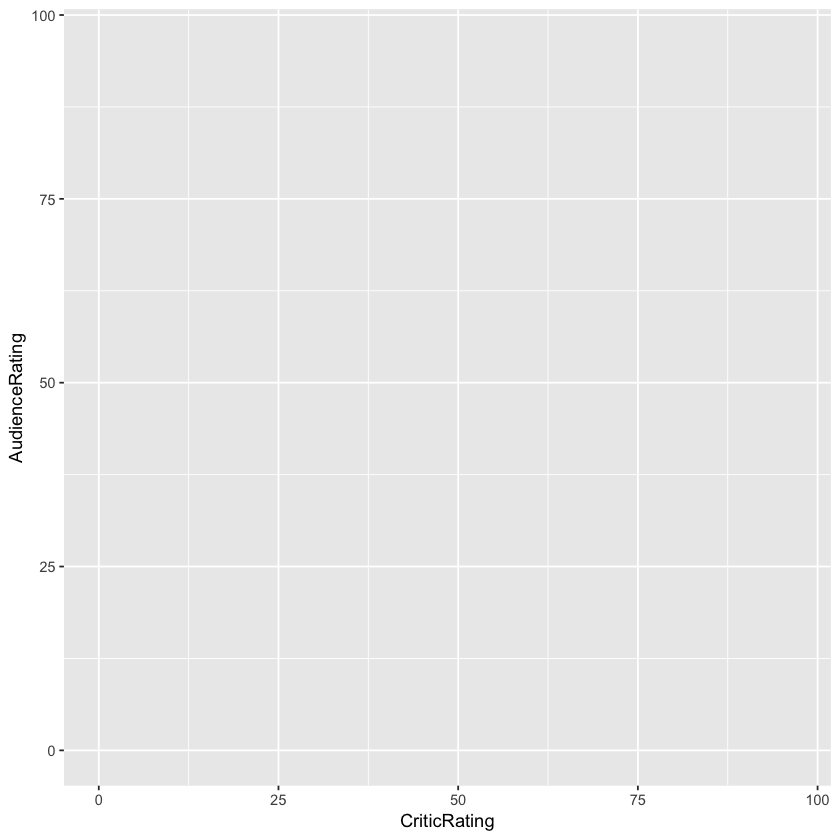

In [29]:
#********************* Aesthetics
library(ggplot2)

#aesthetics aes() #how data maps to desired visual
ggplot(data=movies, aes(x=CriticRating, y=AudienceRating))

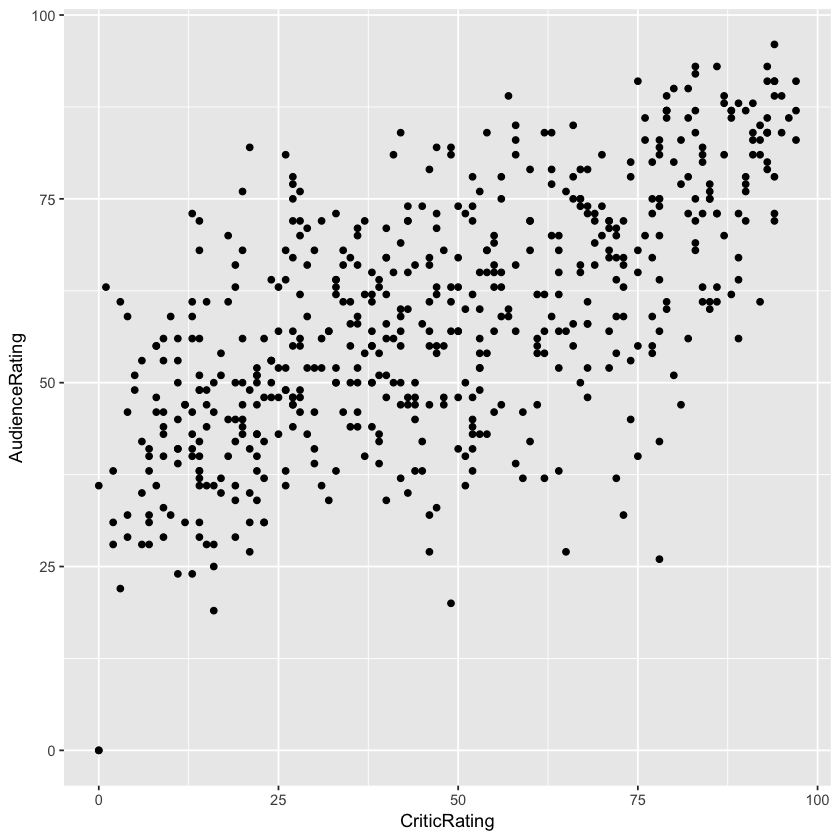

In [30]:
#add geometry geom_point()
ggplot(data=movies, aes(x=CriticRating, y=AudienceRating))+
  geom_point()

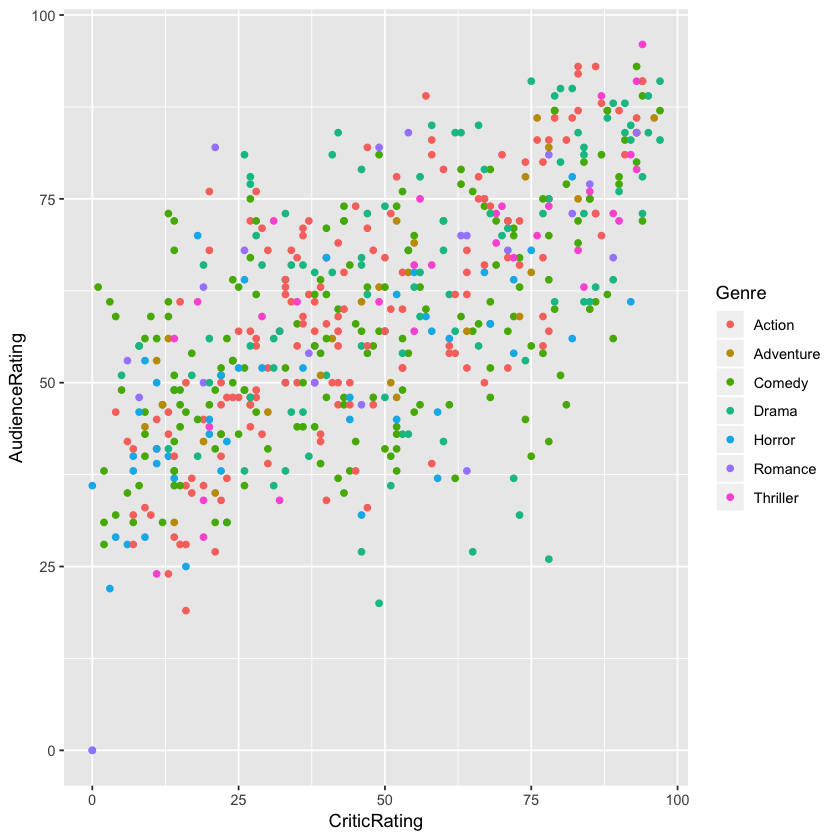

In [31]:
#add colour
ggplot(data=movies, aes(x=CriticRating, y=AudienceRating, colour=Genre))+
  geom_point()

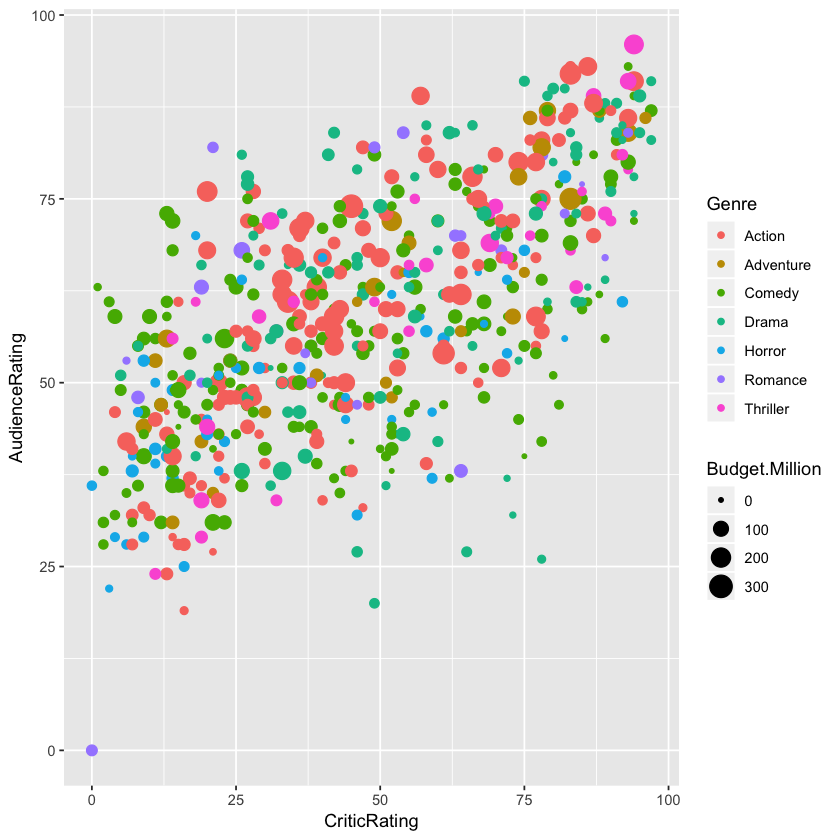

In [32]:
#now add size to depict budget
ggplot(data=movies, aes(x=CriticRating, y=AudienceRating, 
                        colour=Genre, size=Budget.Million))+
  geom_point()


In [33]:
#********************* Plotting with layers

#everytime you want to add layer, you have to literally add it
#a new object is created
p <- ggplot(data=movies, aes(x=CriticRating, y=AudienceRating, 
                             colour=Genre, size=Budget.Million))+
  geom_point()

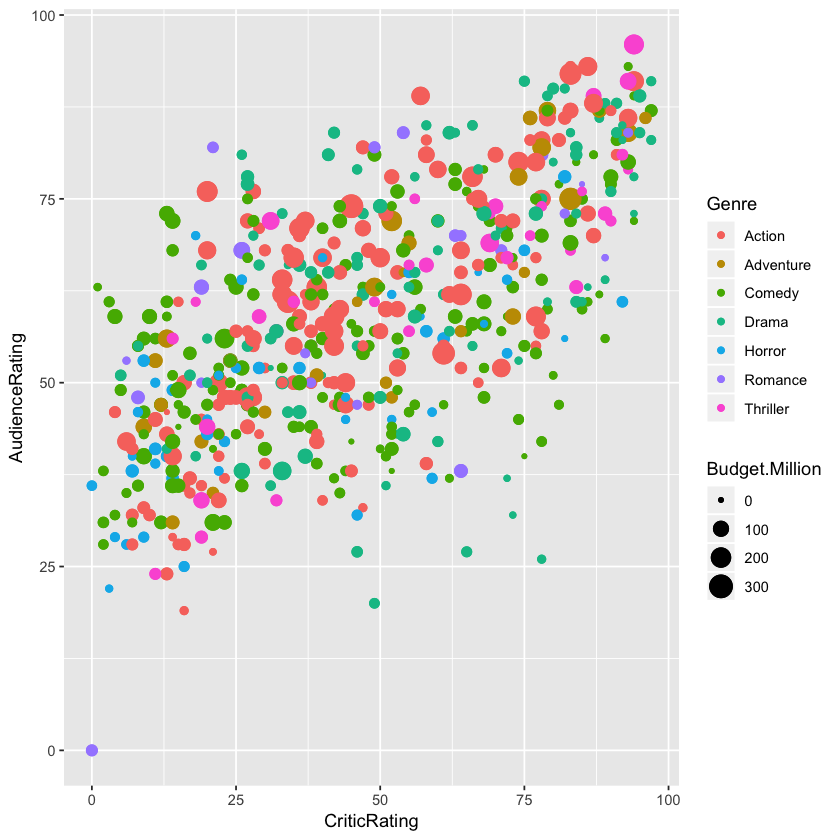

In [34]:
#point // both plots are overlayed on top of each other
p + geom_point()


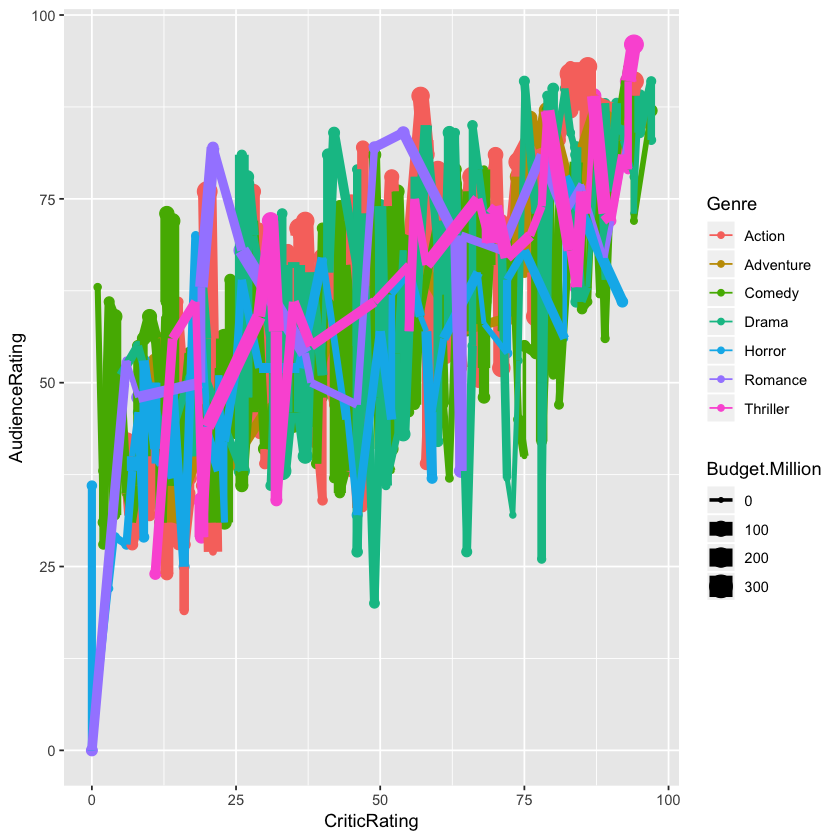

In [35]:
#lines
p + geom_line()

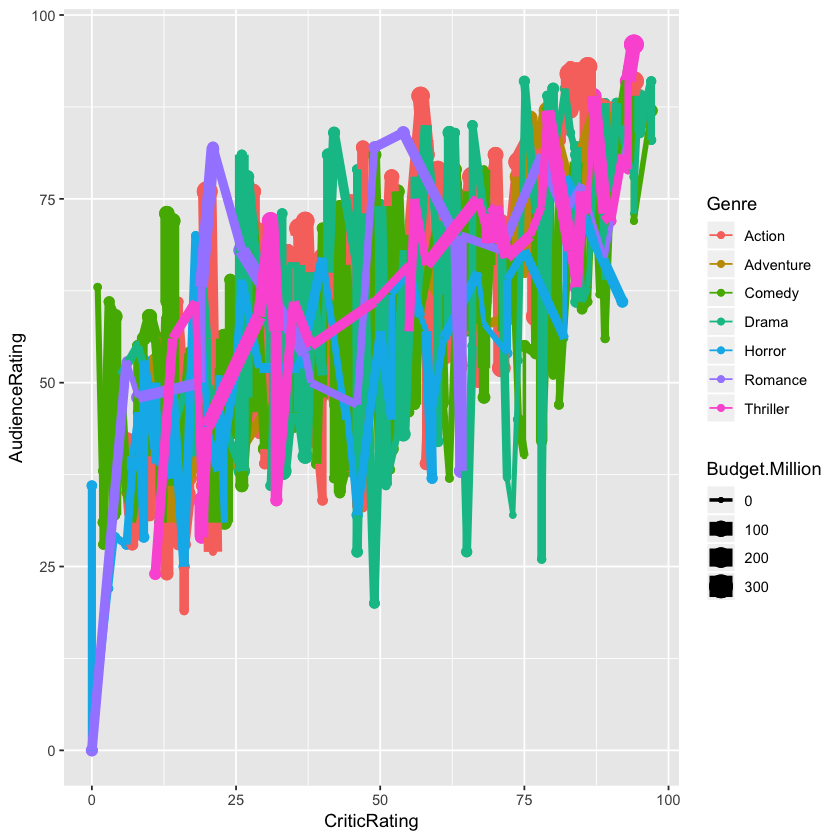

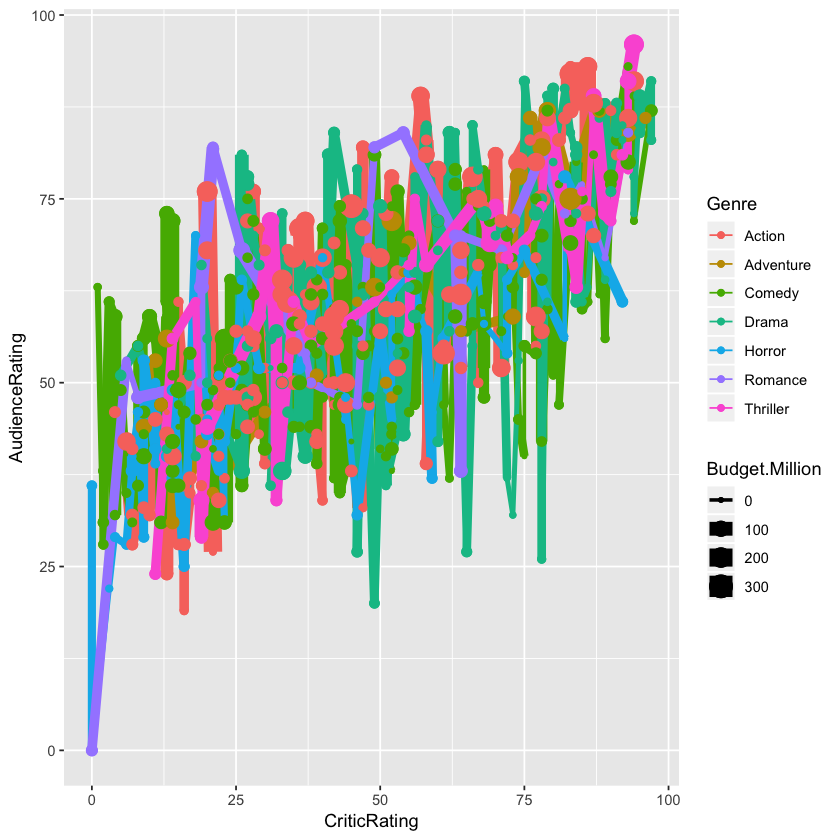

In [36]:
#multiple layers
p + geom_point() + geom_line()
p + geom_line() + geom_point()

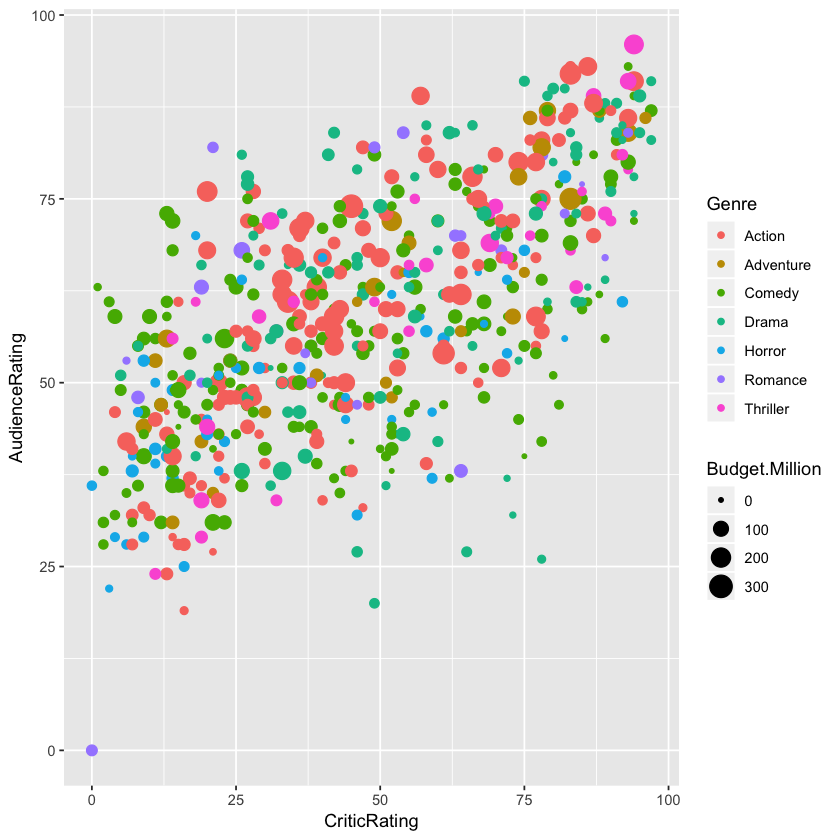

In [37]:
#********************* Overriding Aesthetics

q <- ggplot(data=movies, aes(x=CriticRating, y=AudienceRating, 
                               colour=Genre, size=Budget.Million))
#add geometric layer
q + geom_point()

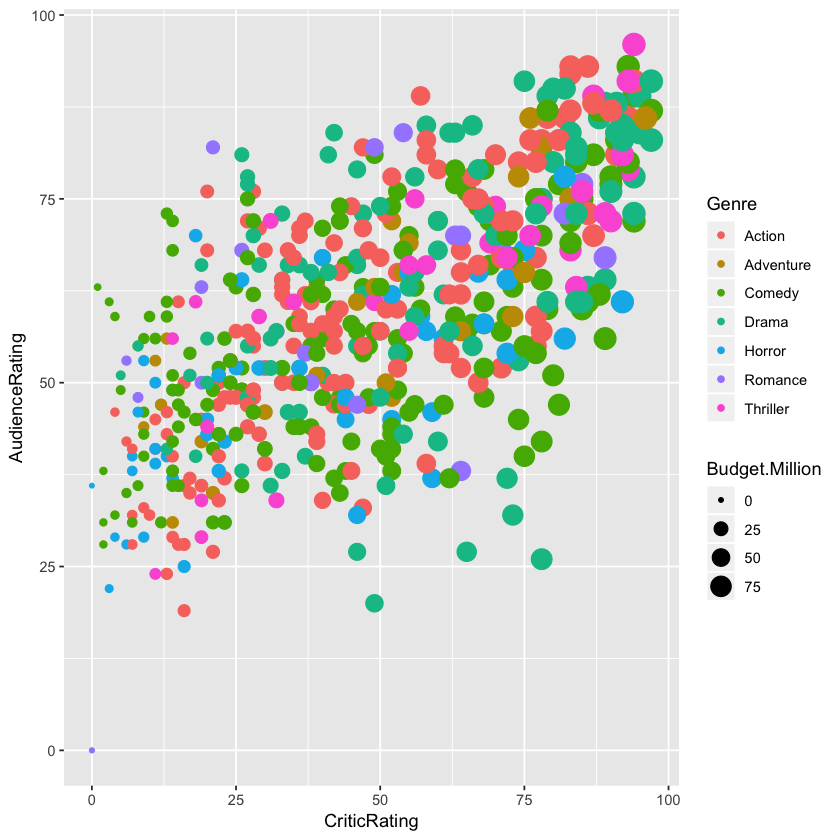

In [38]:
#now overriding aes
#here critic rating is increasing as you approach 100
q + geom_point(aes(size=CriticRating))

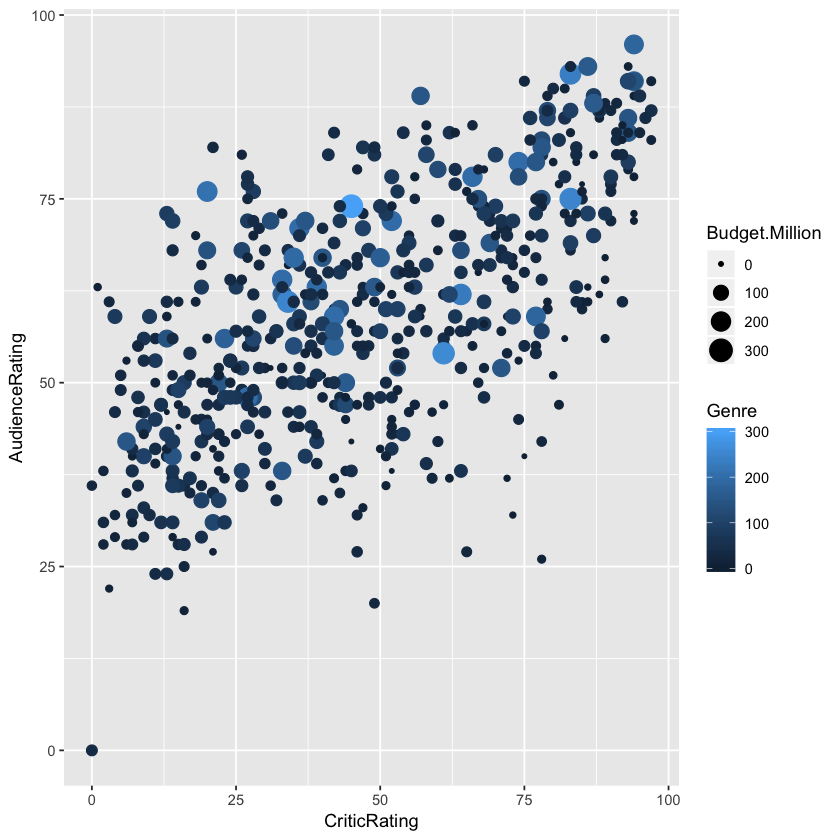

In [39]:
#ex. 2
#q remains the same
q + geom_point(aes(colour=Budget.Million))

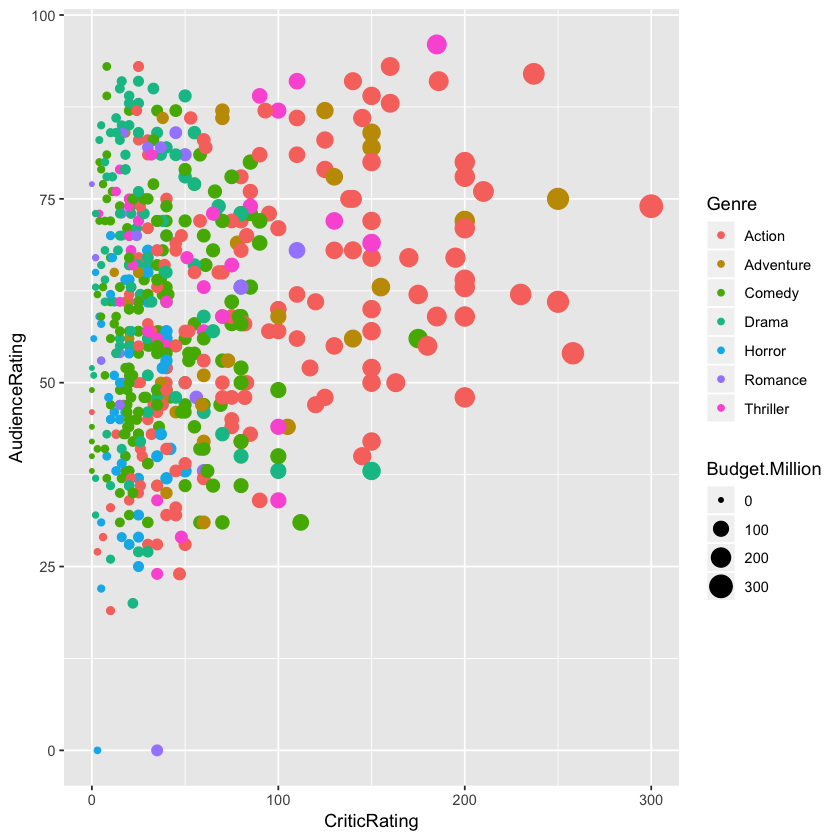

In [40]:
#Ex.3:we can also overide the x-axis and/or y-axis
#note that budget doesn't affect audience ratings
q + geom_point(aes(x=Budget.Million))


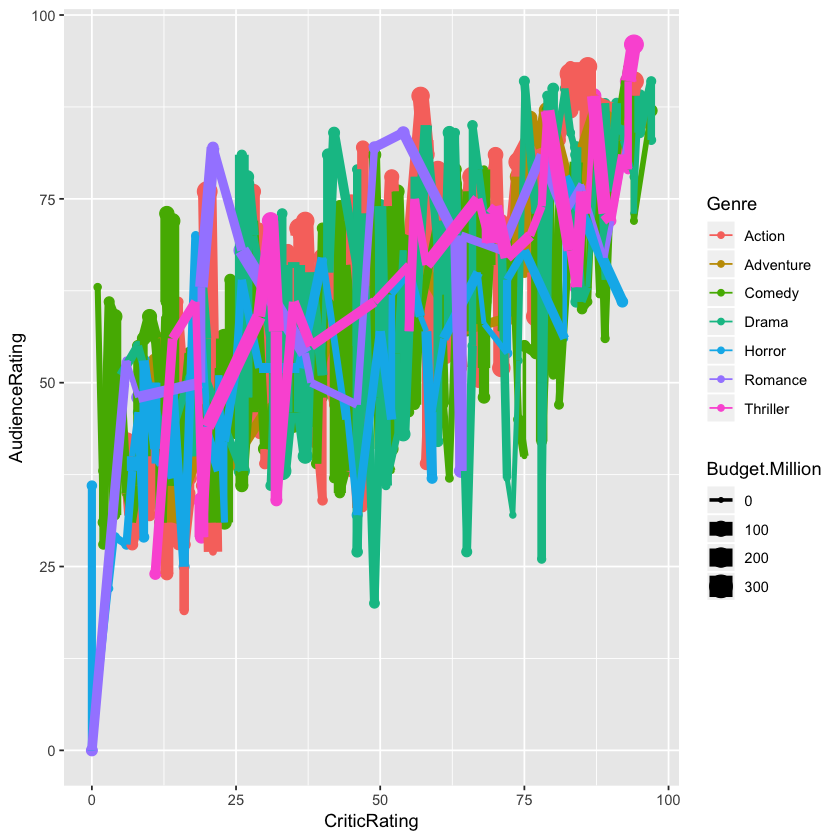

In [41]:
#Ex.4
q + geom_point() + geom_line()

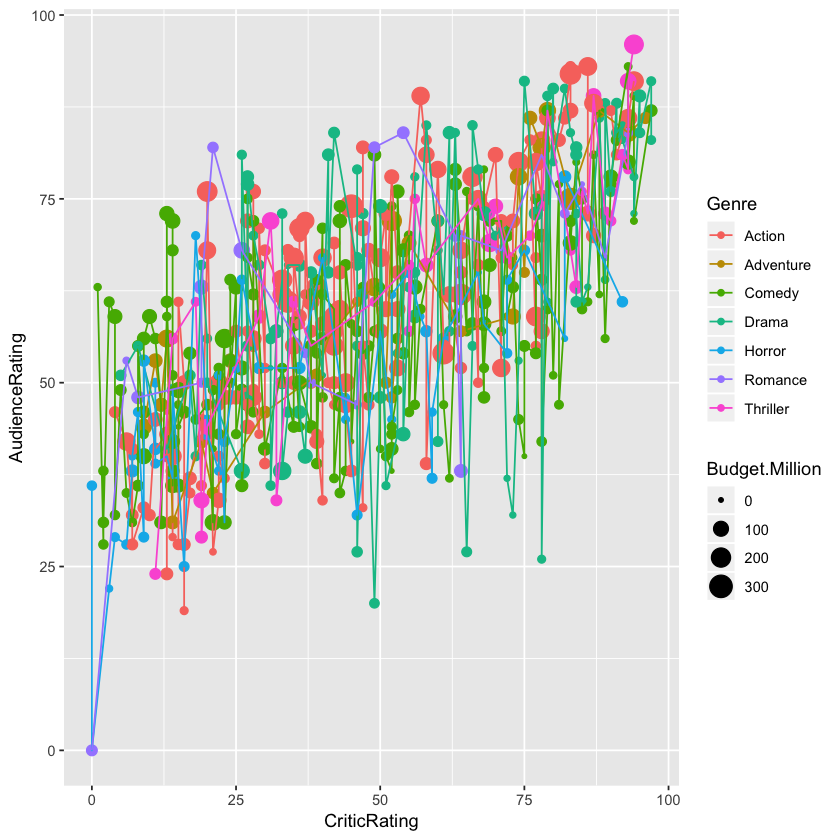

In [45]:
#reduce the line size
#when making a deliverable: copy graphs and save
q + geom_point() + geom_line(size=0.5)

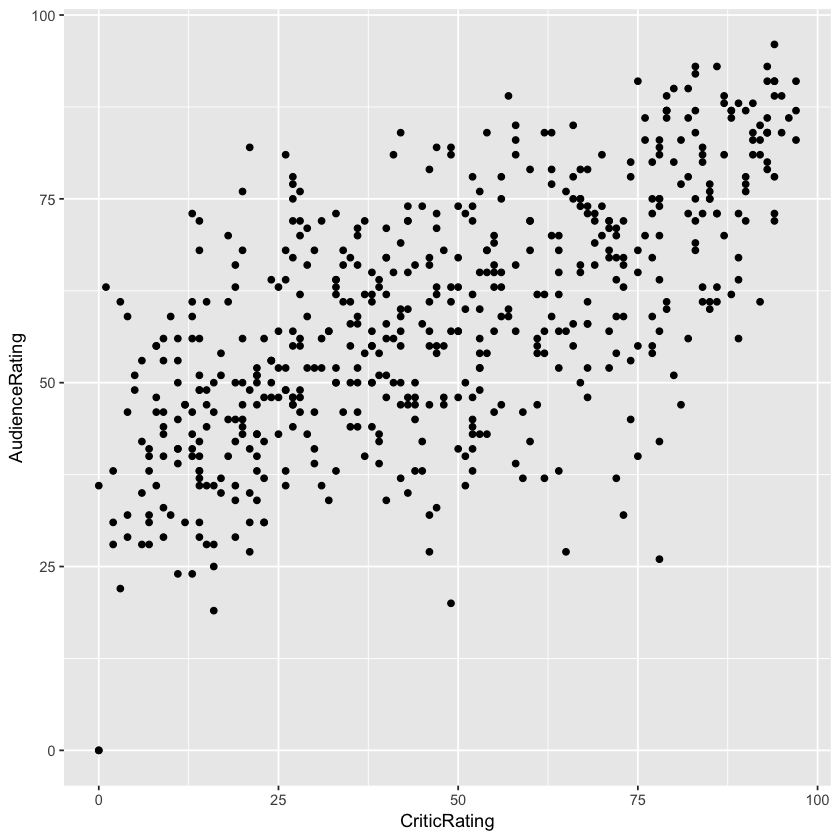

In [47]:
#********************* Mapping vs Subsetting
#what we've done so far
r <- ggplot(data=movies, aes(x=CriticRating, y=AudienceRating))
r + geom_point()

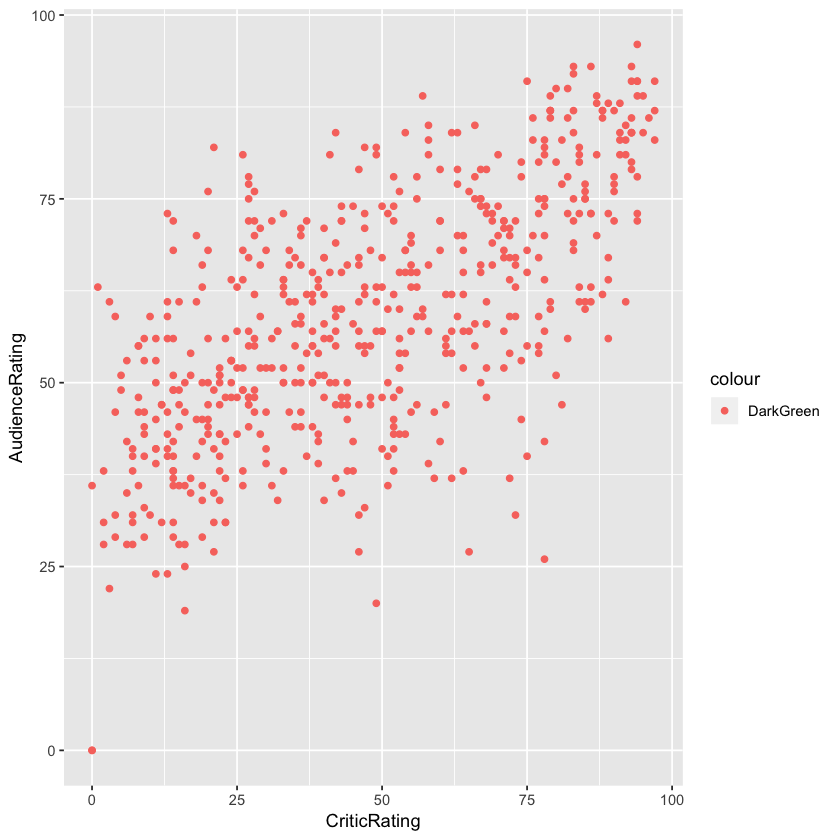

In [48]:
#mapping the colour
r + geom_point(aes(colour="DarkGreen")) #Error:not what we want

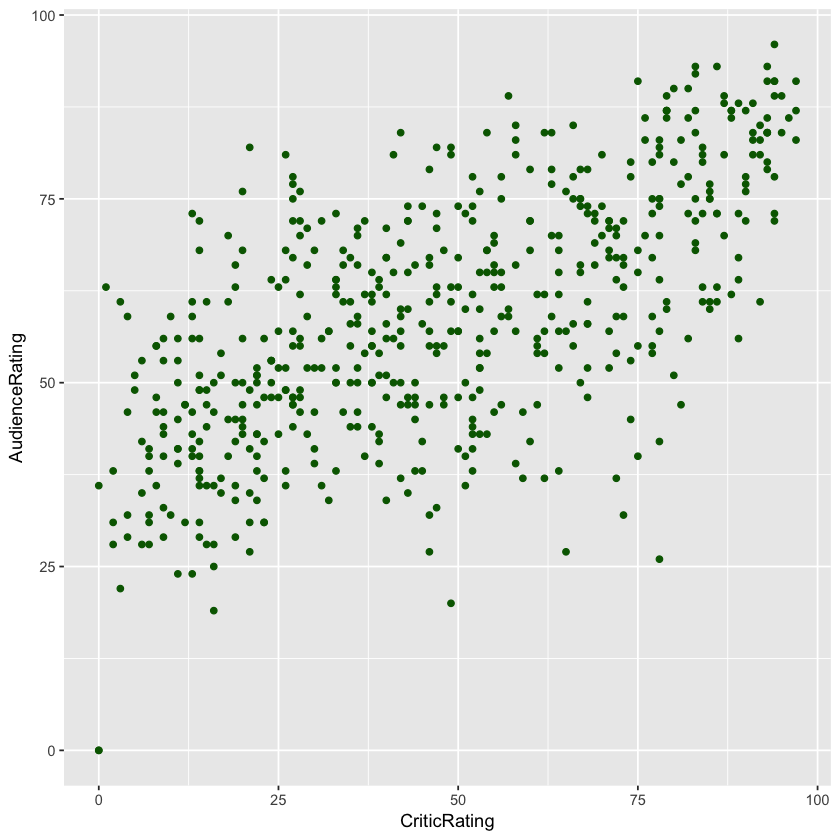

In [49]:
#setting the colour
r + geom_point(colour="DarkGreen")
#if you wanna set the colour, do not use aesthetics
#f you want to map the colour, use aes()

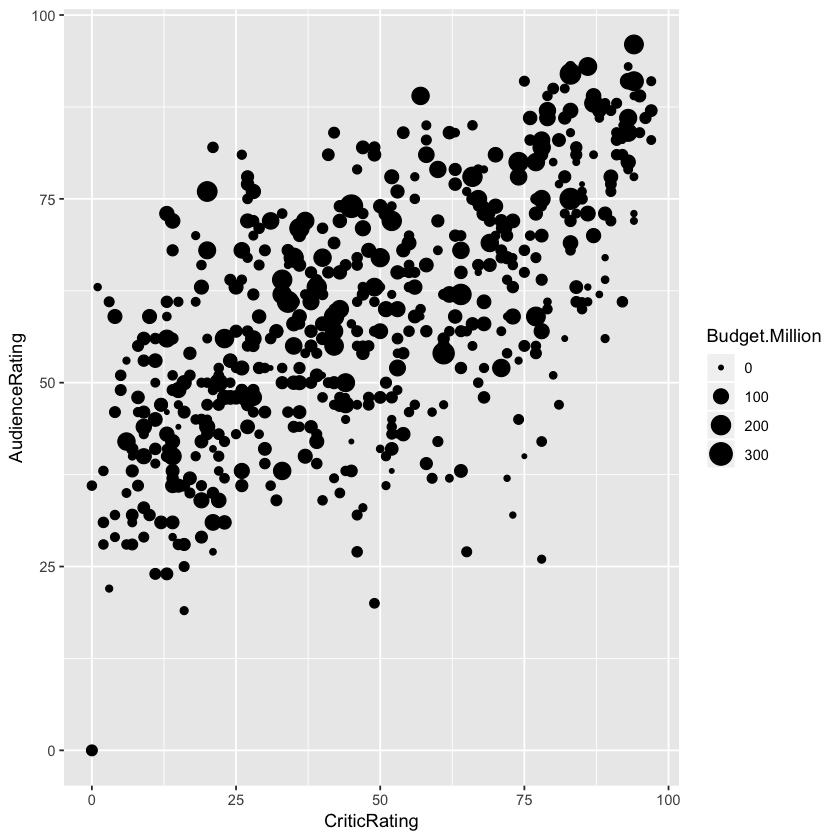

In [50]:
#Setting
r + geom_point(aes(size=Budget.Million)) #Error:not what we want


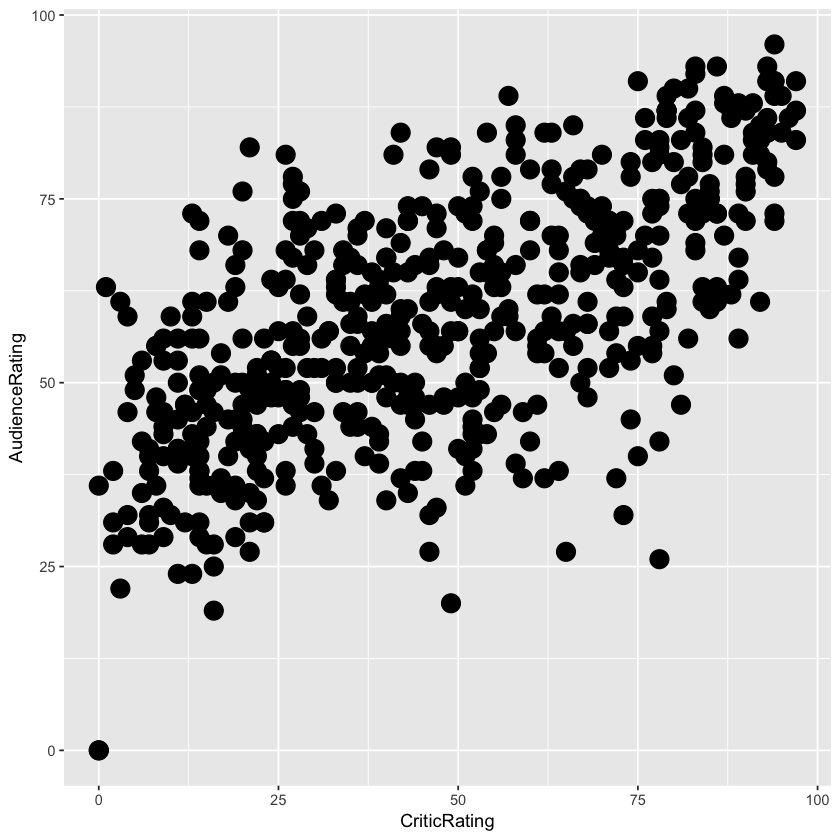

In [53]:
#mapping
r + geom_point(size=5)

In [52]:
#Inconclusion: only use aes() to map something, never set

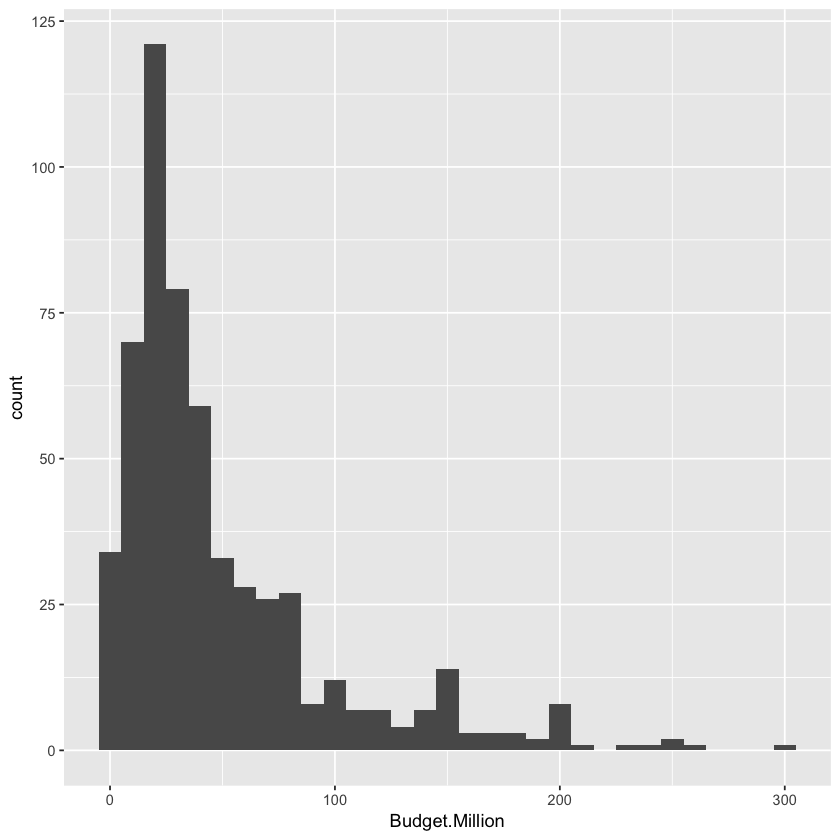

In [54]:
#********************* Histograms and Density Charts
s <- ggplot(data=movies, aes(x=Budget.Million))
s + geom_histogram(binwidth=10)   

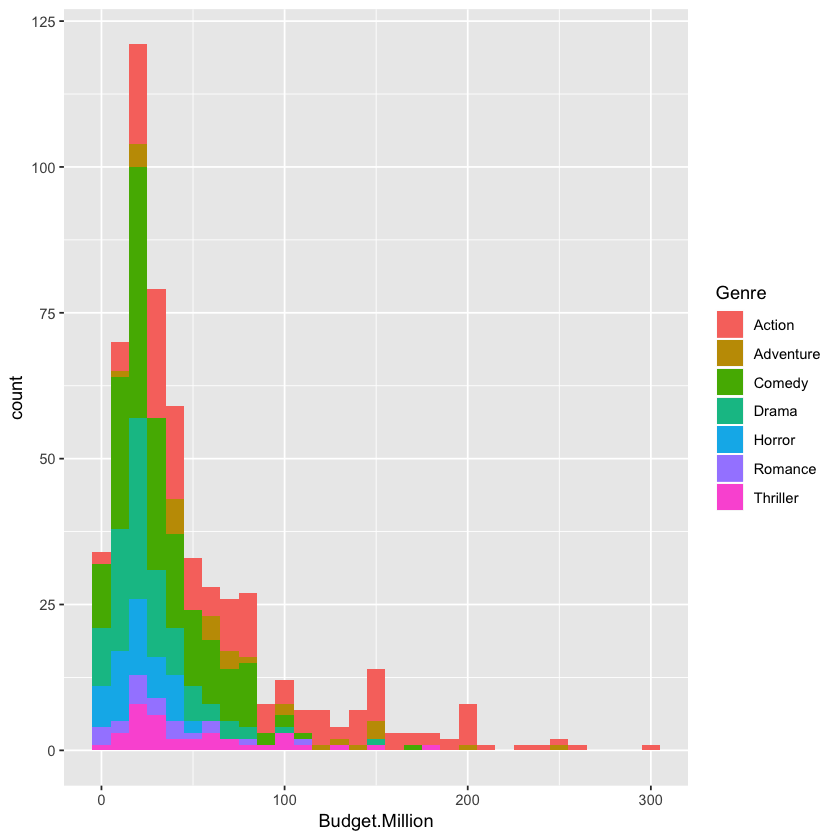

In [55]:
#add colour (set it, not map it)
s + geom_histogram(binwidth = 10, aes(fill=Genre))

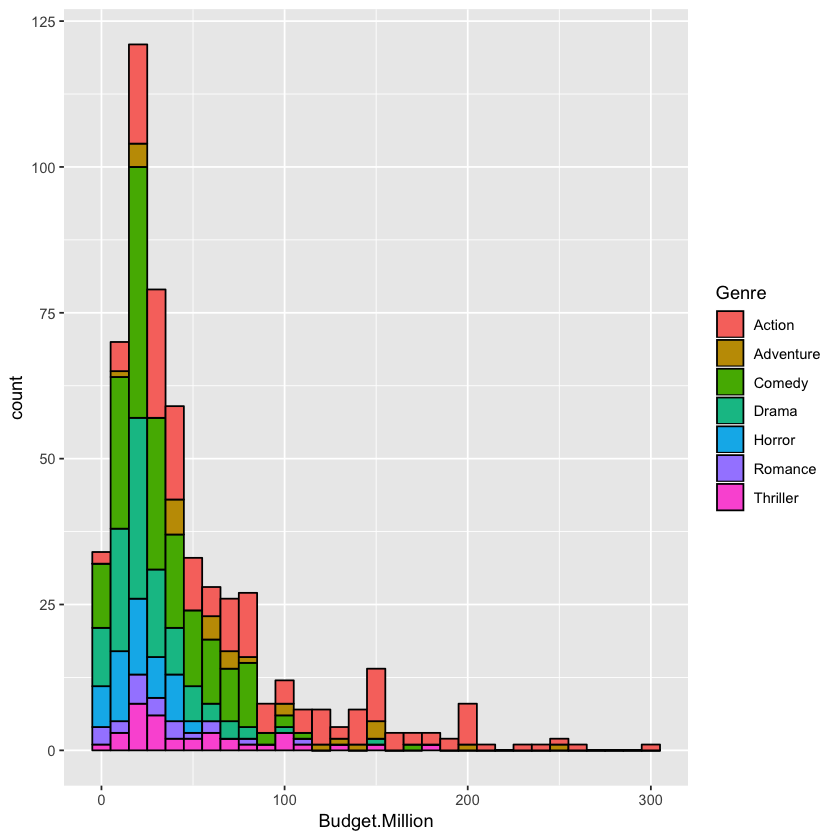

In [56]:
#add a border (set it, not map it) - this chart is to be improved
s + geom_histogram(binwidth = 10, aes(fill=Genre), colour="Black")

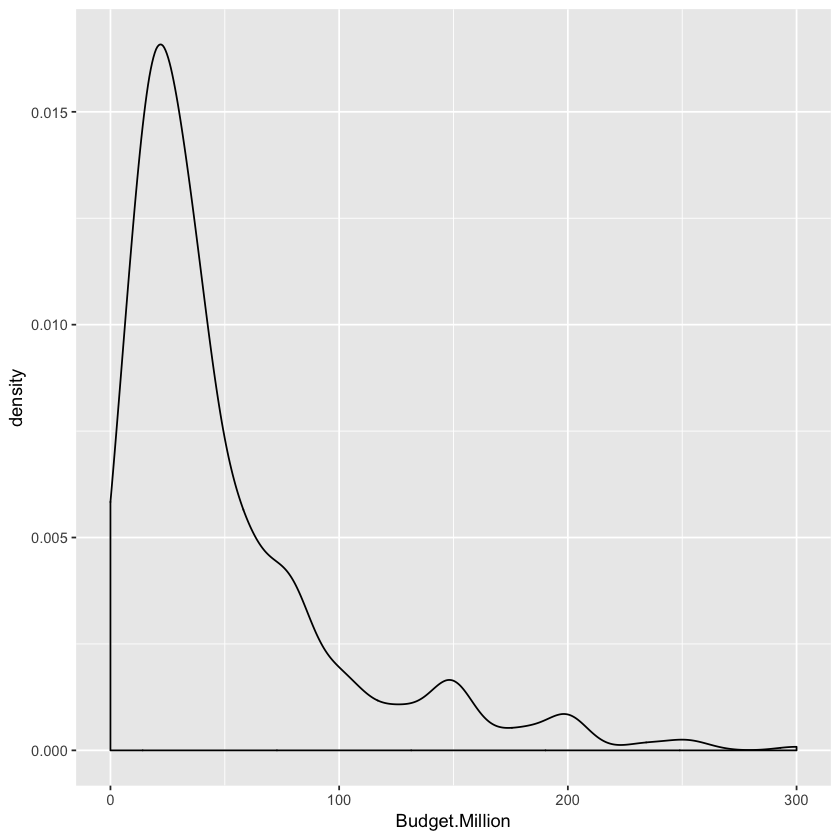

In [57]:
#sometimes you may need this probability Density chart
s+ geom_density()

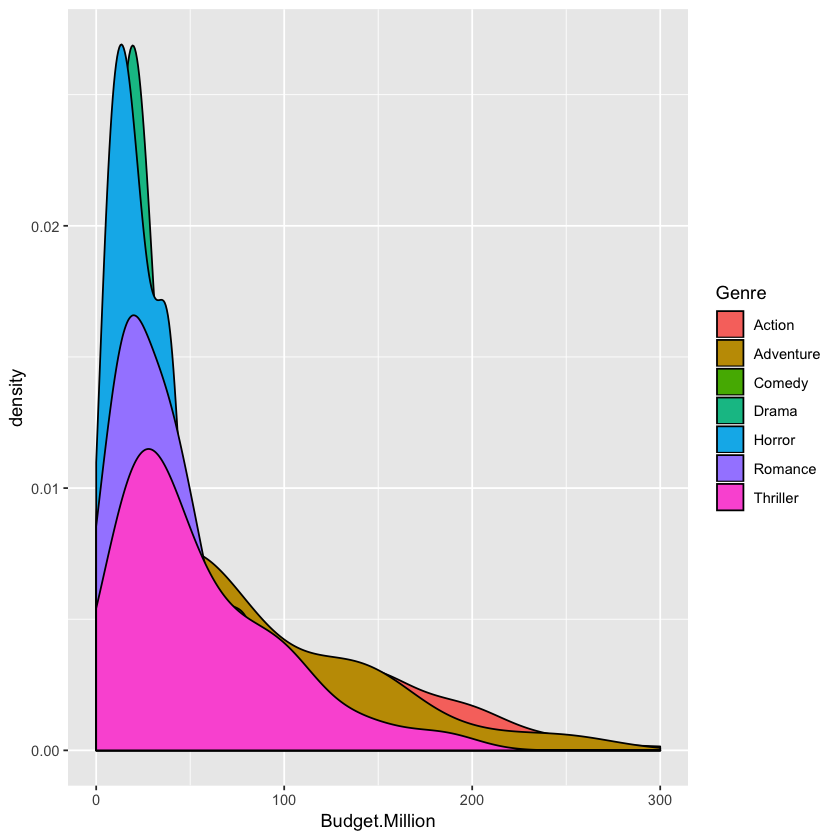

In [59]:
#make the plot look more interesting
s+ geom_density(aes(fill=Genre))

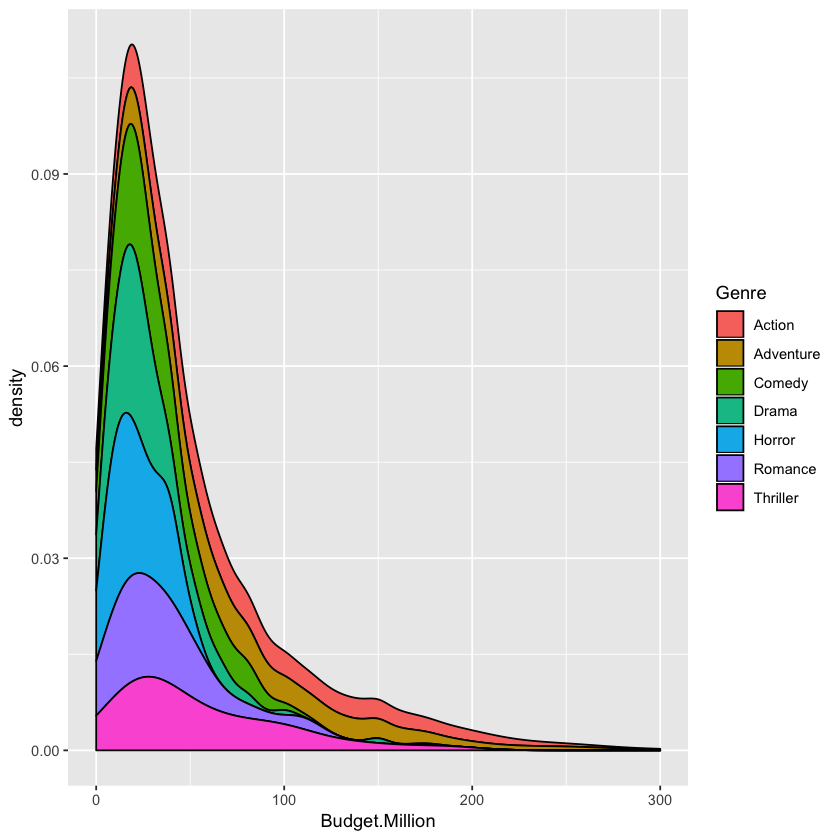

In [60]:
s+ geom_density(aes(fill=Genre), position="stack")

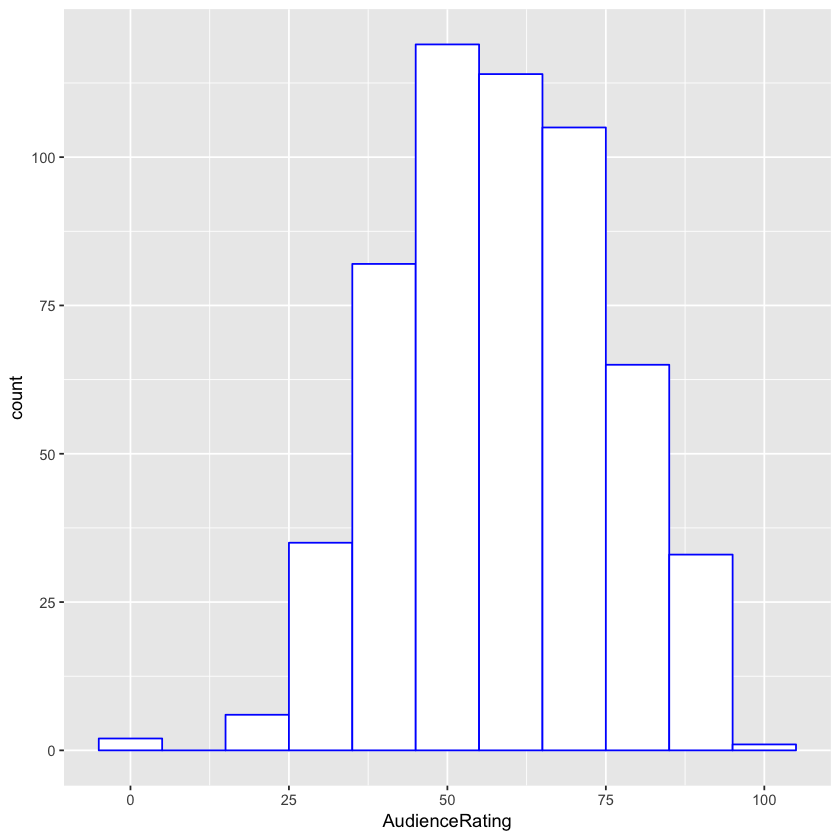

In [61]:
#********************* Starting Layer Tips

t <- ggplot(data=movies, aes(x=AudienceRating))
t + geom_histogram(binwidth = 10,
                   fill="white", colour="Blue")


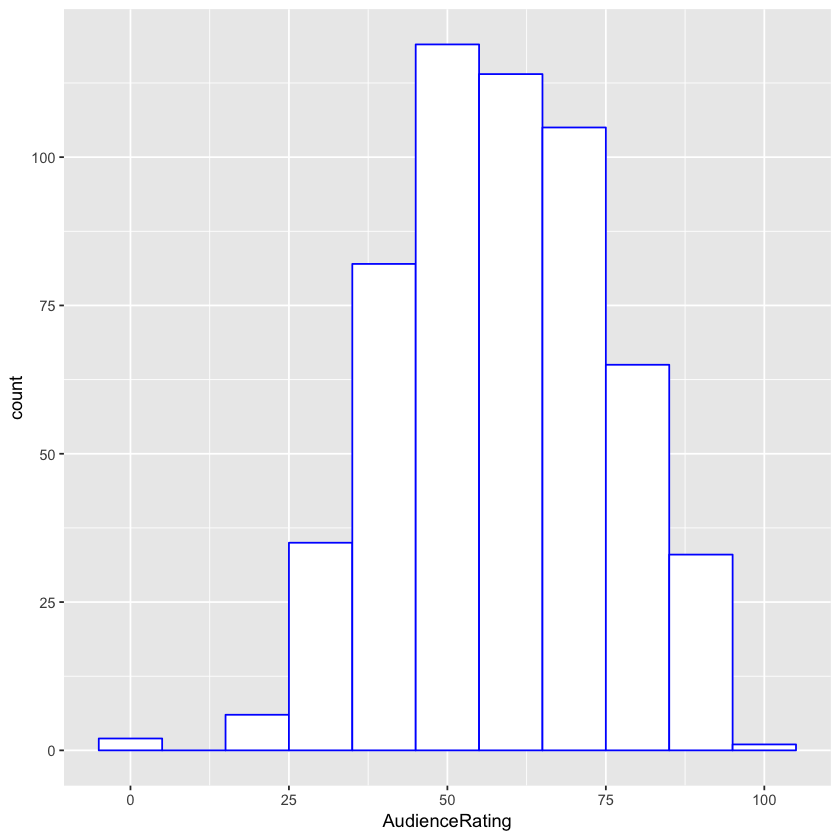

In [62]:
#another way to acheive the above
#here we overide
t <- ggplot(data=movies)
t + geom_histogram(binwidth = 10, aes(x=AudienceRating),
                   fill="white", colour="Blue")


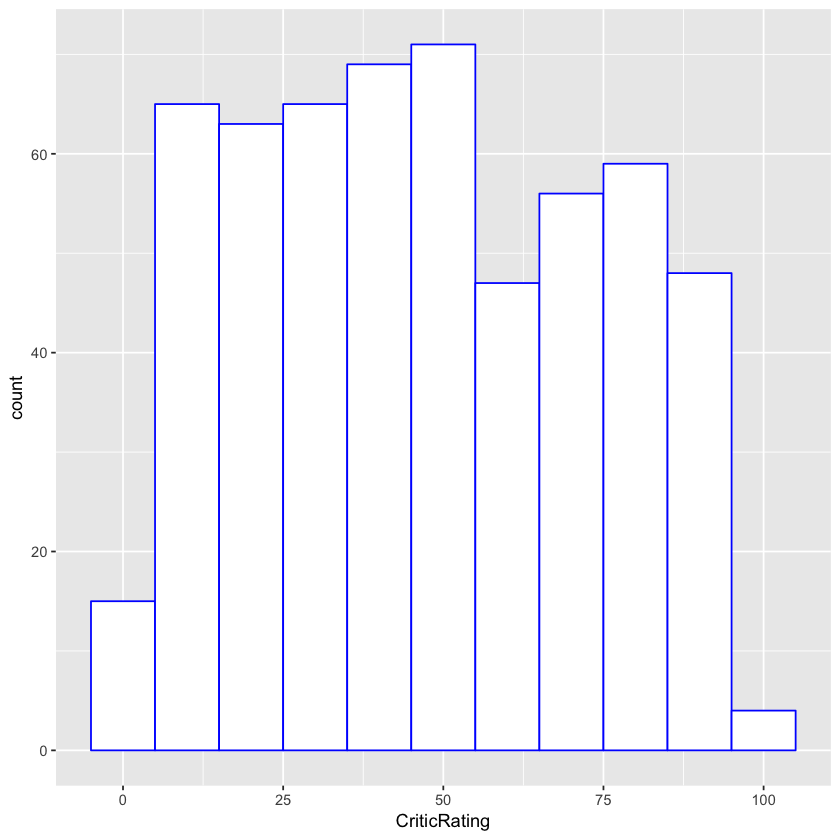

In [63]:
#Another example
#don't rely on overiding, it is not a good code practice
t + geom_histogram(binwidth = 10, aes(x=CriticRating),
                   fill="white", colour="Blue")


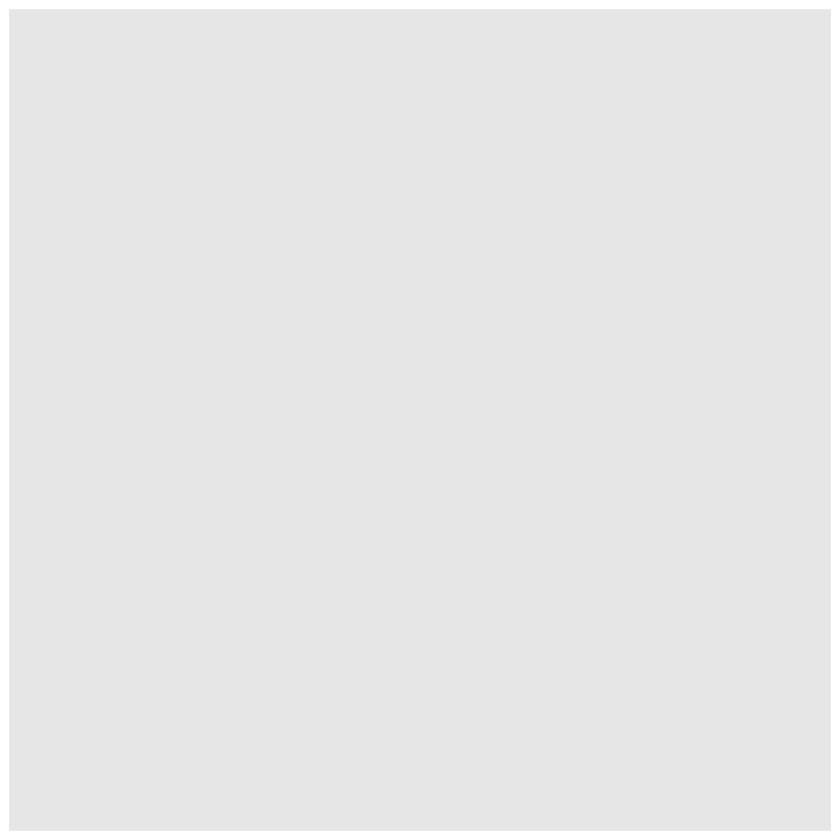

In [64]:
#a skeleton plot: to use different dataset on the plot
t <- ggplot()
t


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


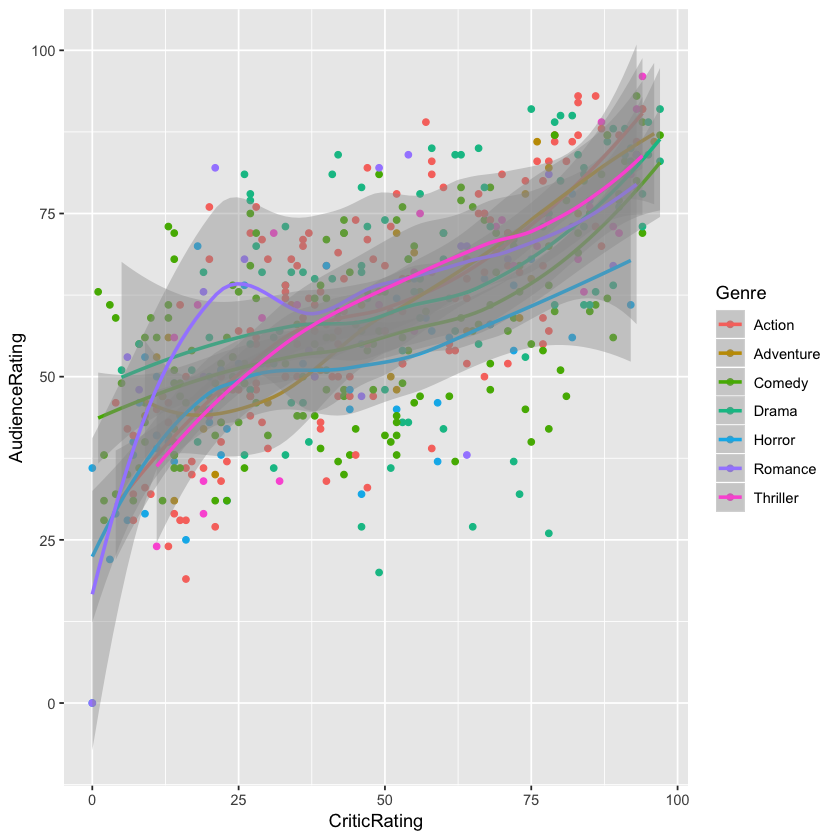

In [65]:
#********************* Statistical Transformations
?geom_smooth

u <- ggplot(data=movies, aes(x=CriticRating, y=AudienceRating,
                             colour=Genre))
u + geom_point() + geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


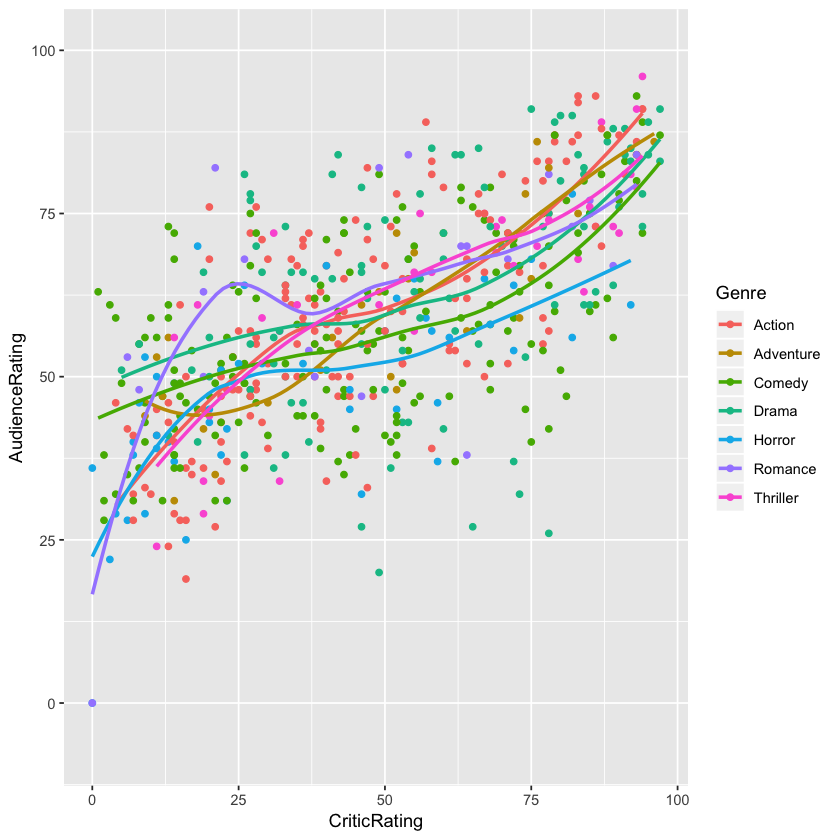

In [66]:
#the plot above is too messy, remove the fill
u + geom_point() + geom_smooth(fill=NA)

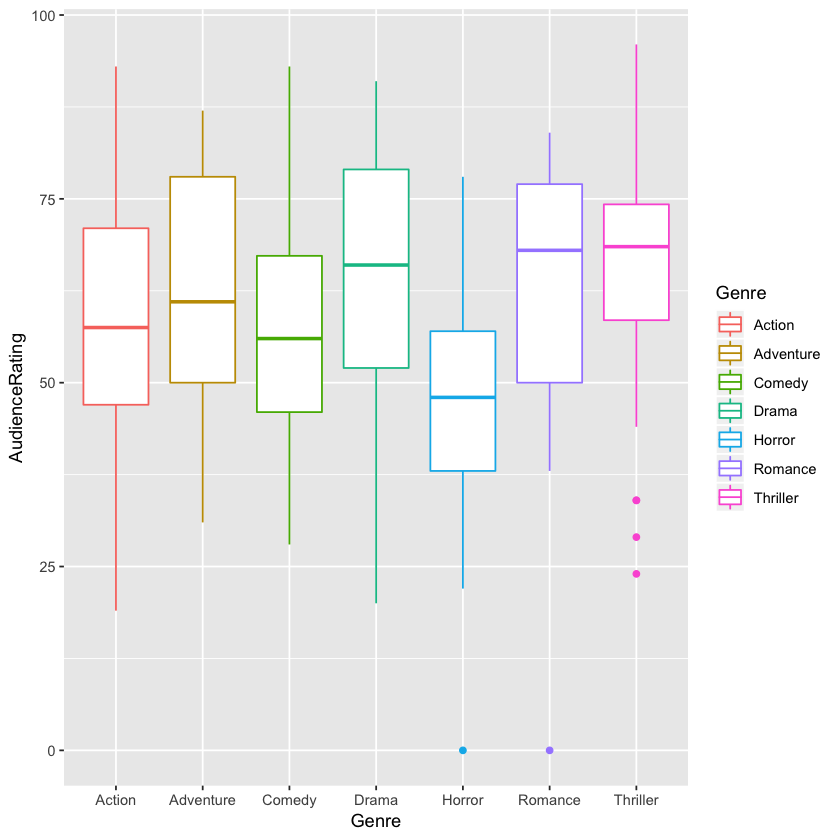

In [69]:
#boxplots
u <- ggplot(data=movies, aes(x=Genre, y=AudienceRating,
                             colour=Genre))

u + geom_boxplot()

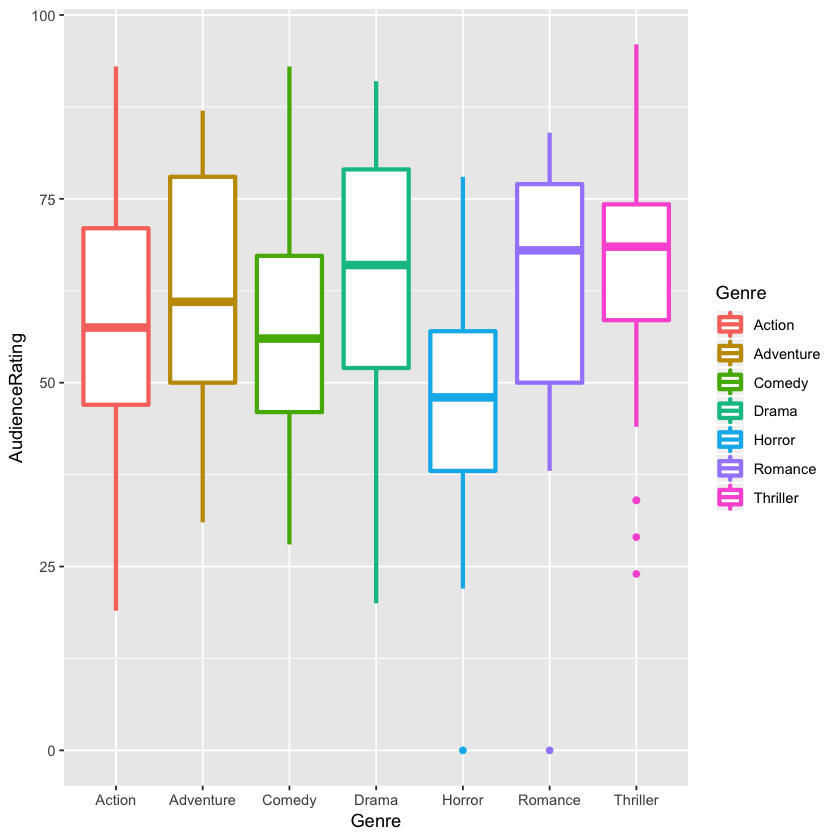

In [70]:
u + geom_boxplot(size=1.2) #change size

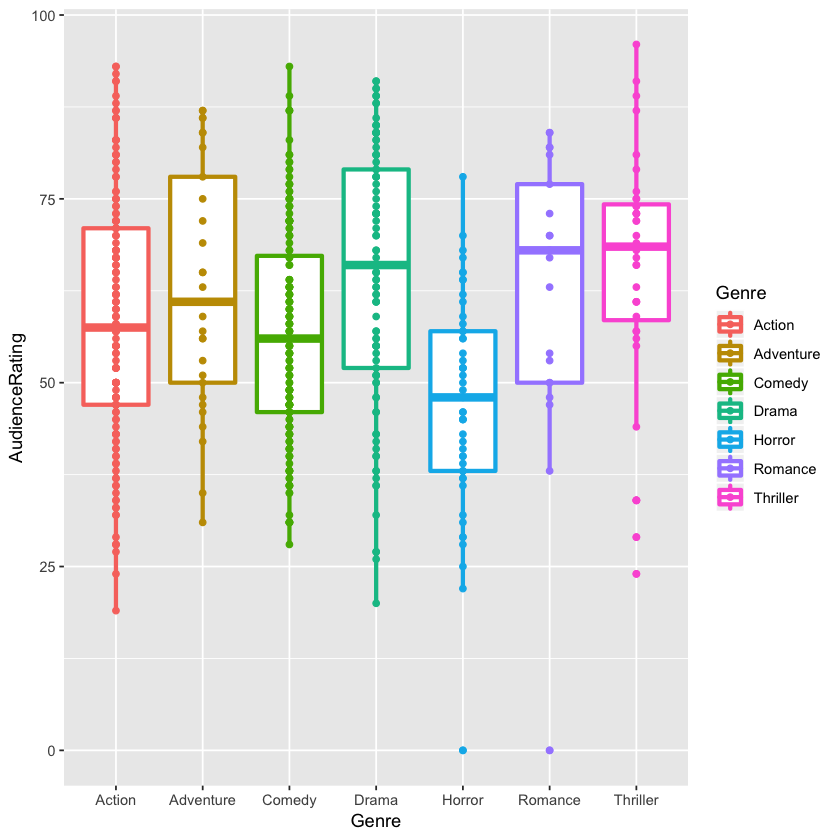

In [71]:
u + geom_boxplot(size=1.2) + geom_point() #too messy!

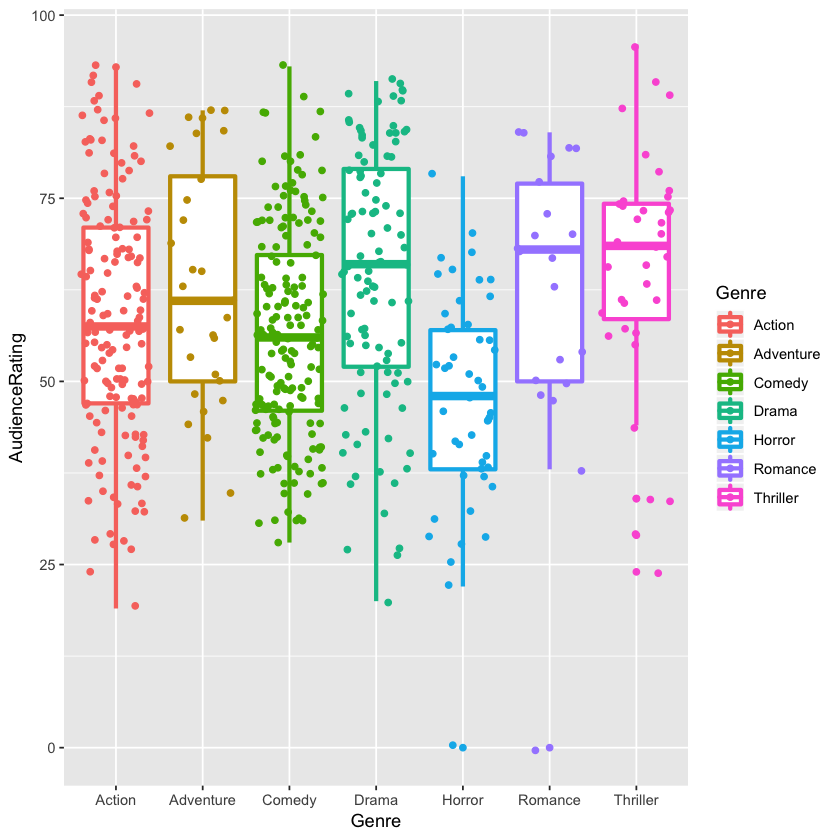

In [72]:
#tip/hack: geom_jitter()
#jitter is a powerful tool when combined with boxplot
u + geom_boxplot(size=1.2) + geom_jitter()


Warning message:
“Ignoring unknown parameters: aplha”

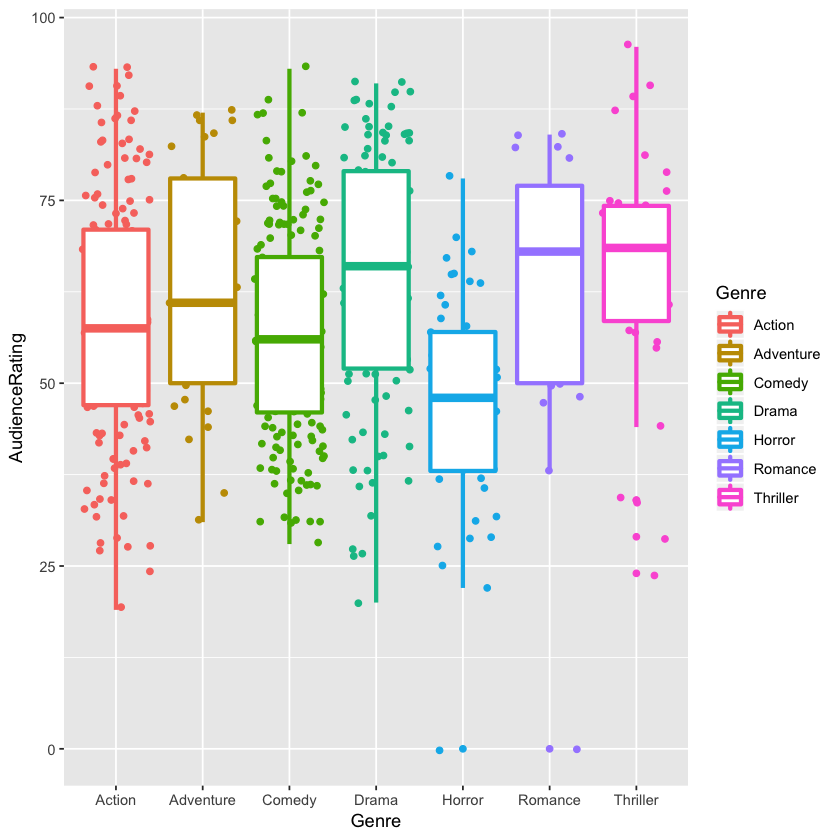

In [73]:
#Another way:
u + geom_jitter() + geom_boxplot(size=1.2, aplha=0.5)

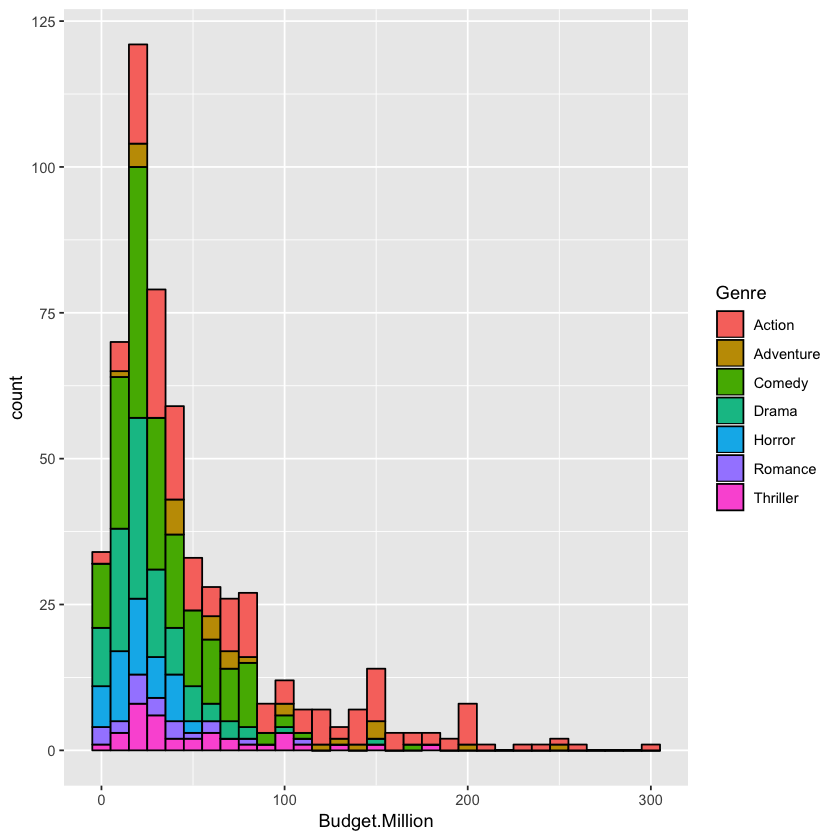

In [74]:
#********************* Facets

v <- ggplot(data=movies, aes(x=Budget.Million))
v + geom_histogram(binwidth = 10, aes(fill=Genre), colour="Black")

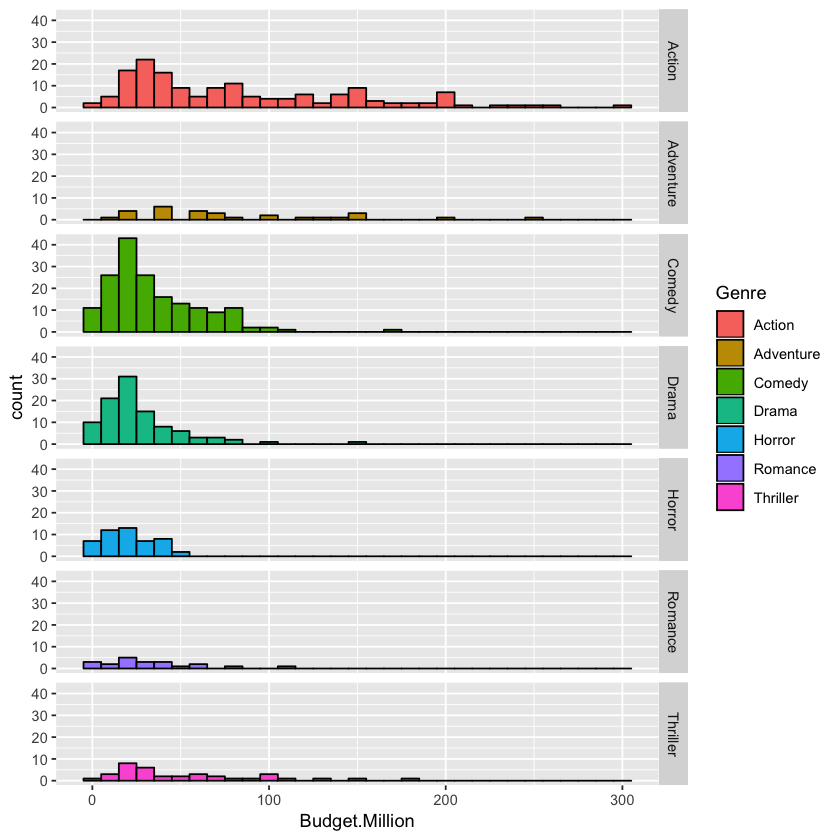

In [75]:
#Facets: facet by Genre
v + geom_histogram(binwidth = 10, aes(fill=Genre), colour="Black") +
  facet_grid(Genre~.)


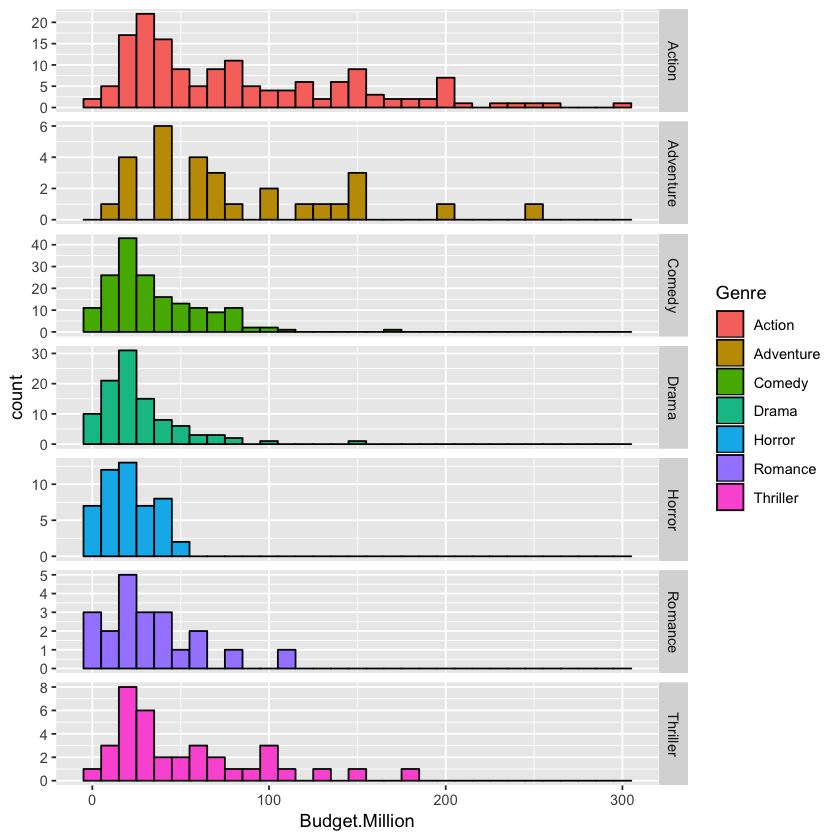

In [76]:
#use scales="free" to free up the scales
v + geom_histogram(binwidth = 10, aes(fill=Genre), colour="Black") +
  facet_grid(Genre~., scales="free")


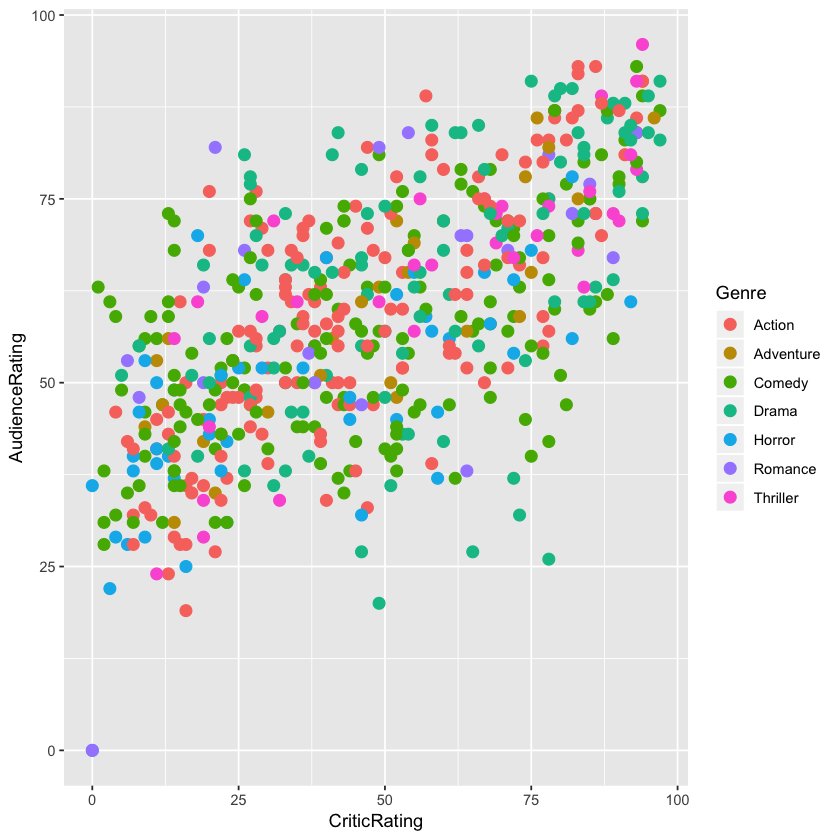

In [77]:
#now apply facets to scatterplot
w <- ggplot(data=movies, aes(x=CriticRating, y=AudienceRating,
                             colour=Genre))
w + geom_point(size=3)

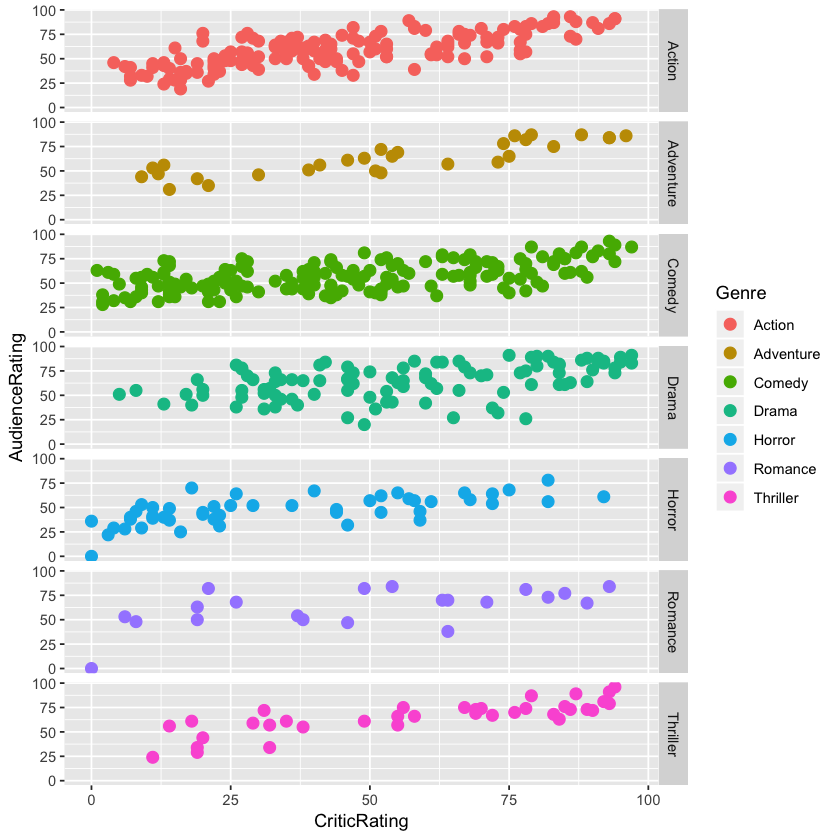

In [79]:
#facets
w + geom_point(size=3) +
  facet_grid(Genre~.)

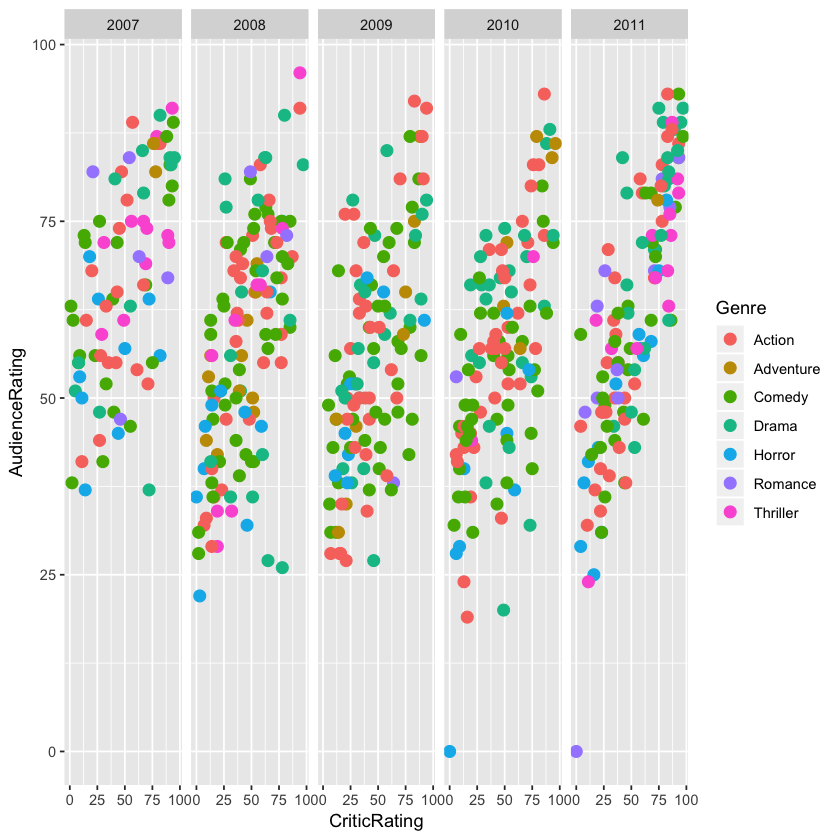

In [81]:
w + geom_point(size=3) +
  facet_grid(.~ReleaseYear)

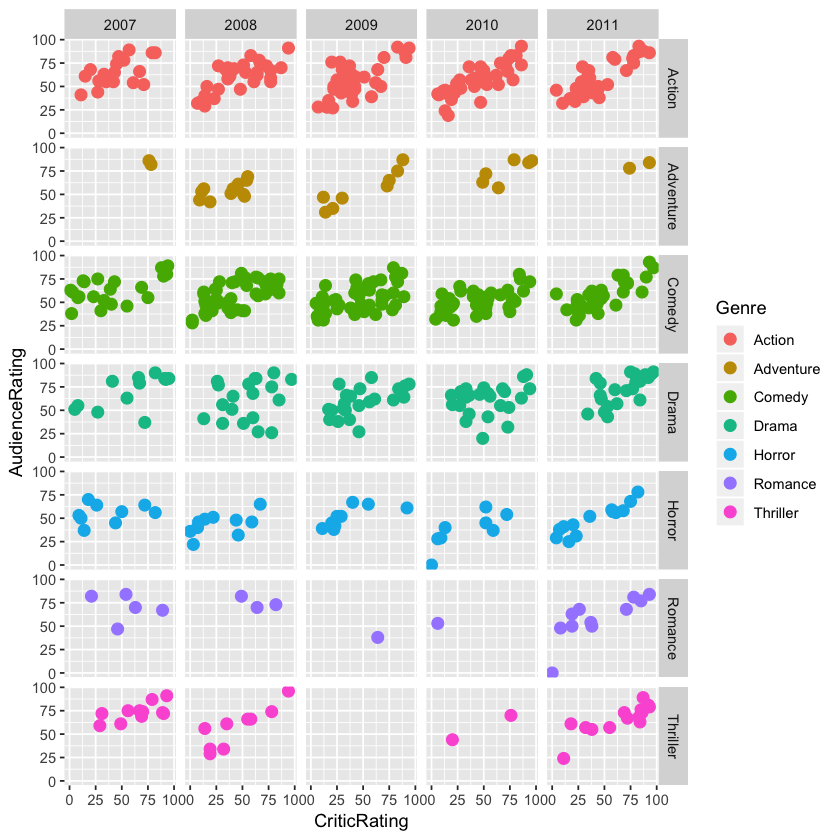

In [87]:
w + geom_point(size=3) +
facet_grid(Genre~ReleaseYear)

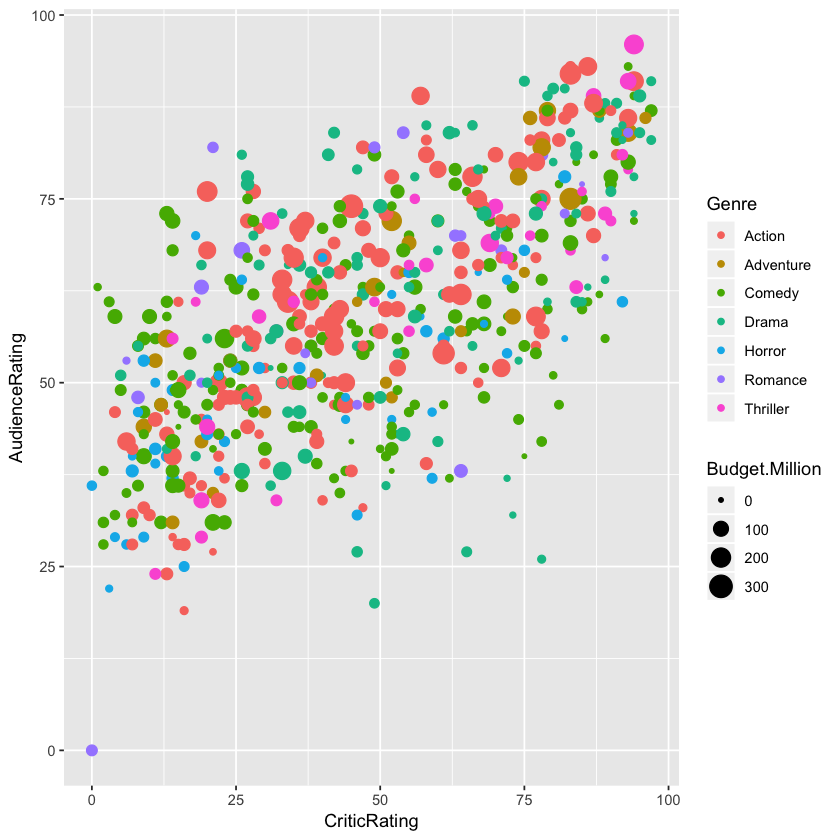

In [89]:
#********************* Coordinates

#goal: limits and zoom
m <-ggplot(data=movies, aes(x=CriticRating, y=AudienceRating,
                            size=Budget.Million, colour=Genre)) 
m + geom_point()

Warning message:
“Removed 335 rows containing missing values (geom_point).”

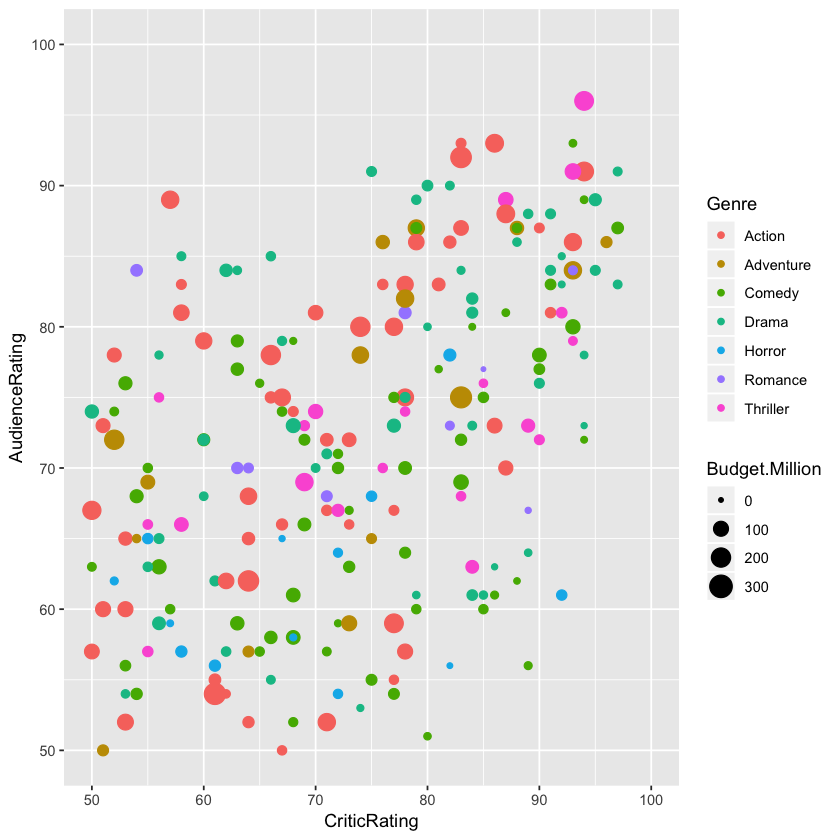

In [90]:
#here we removed some rows #this migh not always work well
m + geom_point() + xlim(50,100) + ylim(50,100)


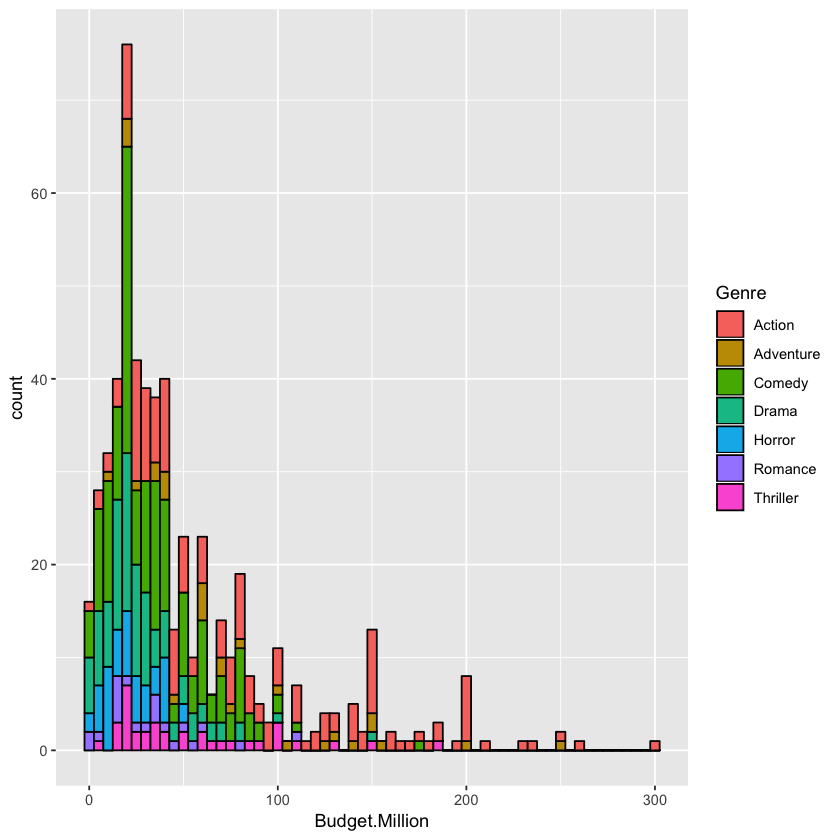

In [91]:
n <-ggplot(data=movies, aes(x=Budget.Million))
n + geom_histogram(binwidth = 5, aes(fill=Genre), colour="Black")

Warning message:
“Removed 11 rows containing missing values (geom_bar).”

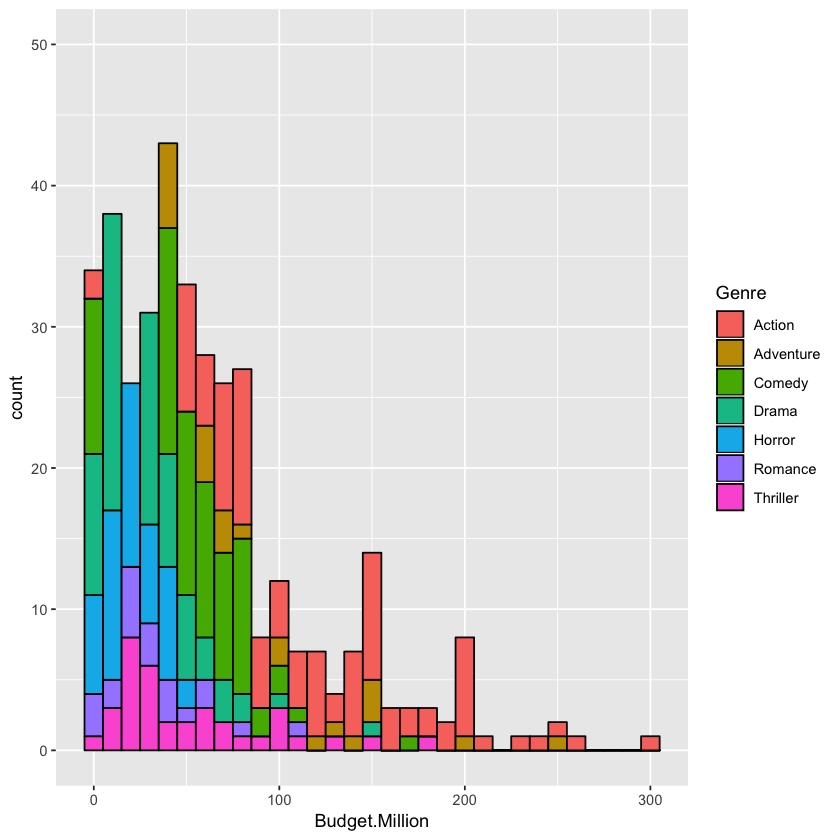

In [92]:
n + geom_histogram(binwidth = 10, aes(fill=Genre), colour="Black") +
  ylim(0,50)

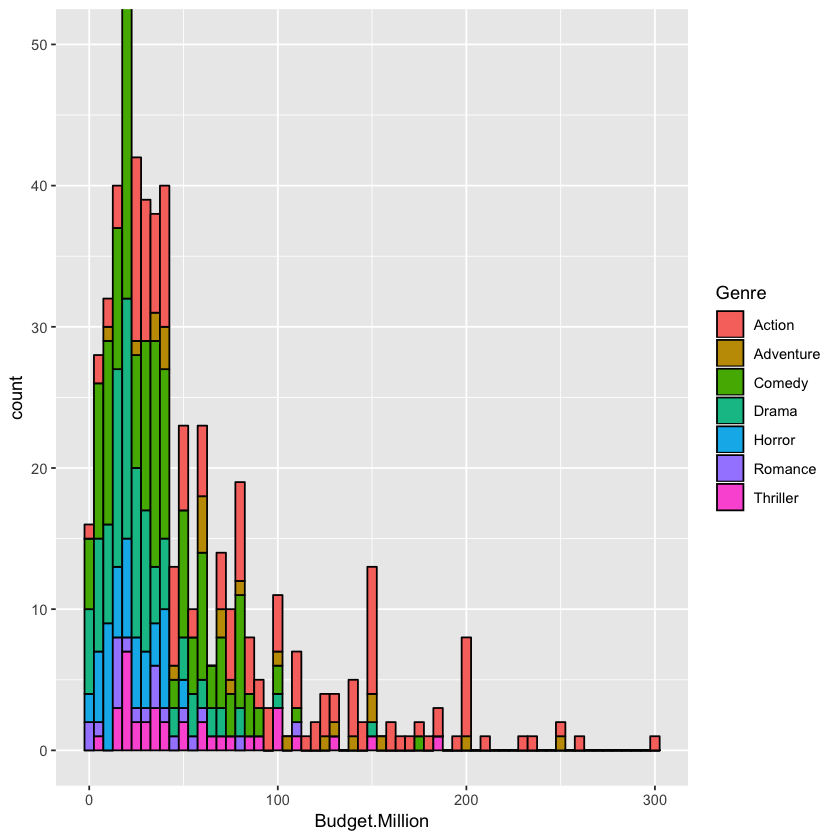

In [93]:
#now zoom into the chart
n + geom_histogram(binwidth = 5, aes(fill=Genre), colour="Black") +
  coord_cartesian(ylim=c(0,50))


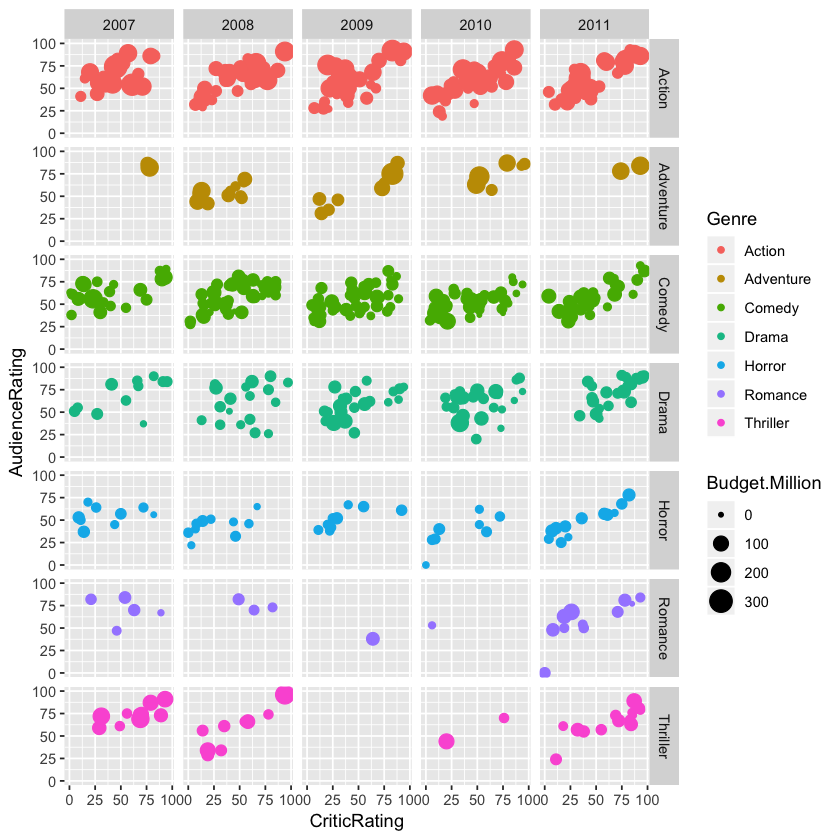

In [98]:
#improve the above form w: what CEO whats
w + geom_point(aes(size=Budget.Million)) +
  facet_grid(Genre~ReleaseYear) +
  coord_cartesian(ylim=c(0,100))

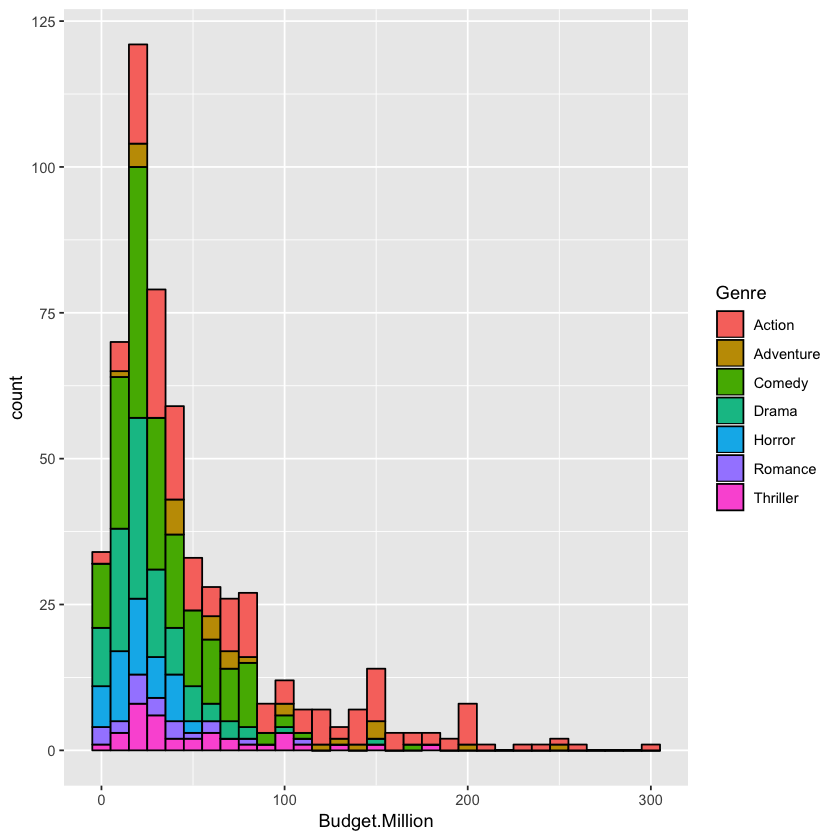

In [99]:
#********************* Theme
o <- ggplot(data=movies, aes(x=Budget.Million))
h<- o + geom_histogram(binwidth=10,aes(fill=Genre), colour="Black")  

h

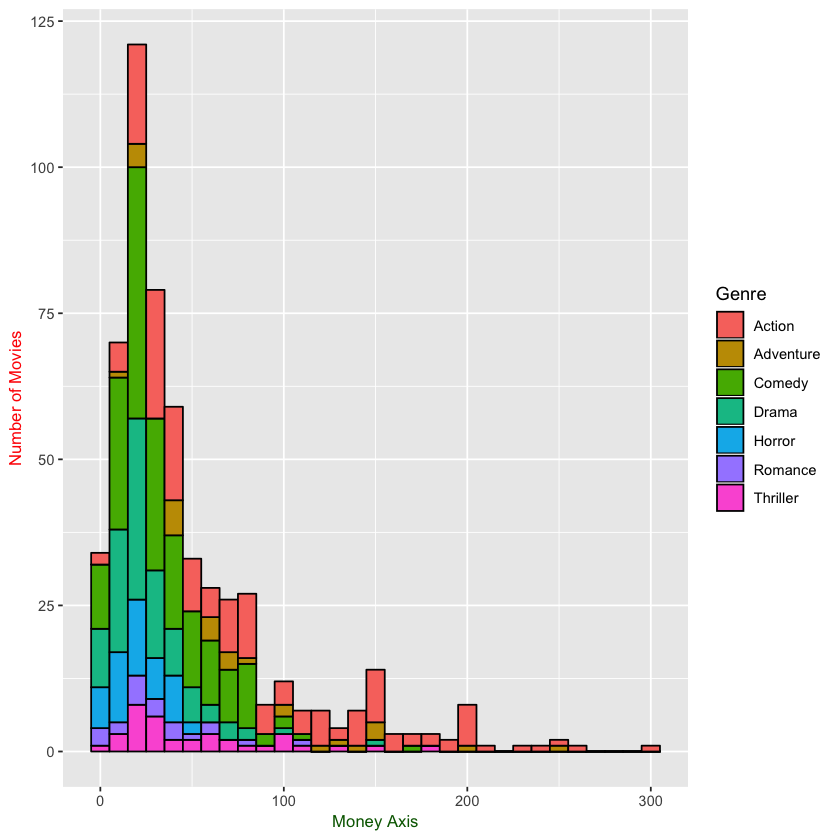

In [100]:
#axes label
h +
  xlab("Money Axis") +
  ylab("Number of Movies") +
  theme(axis.title = element_text(colour="DarkGreen", size=10),
        axis.title.y = element_text(colour="Red", size=10))

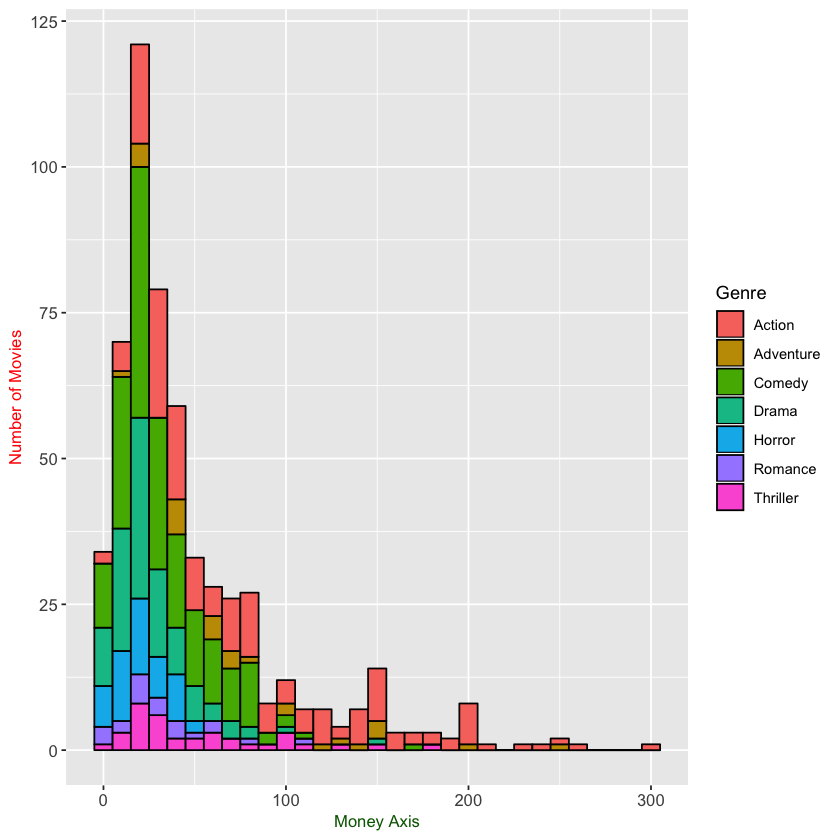

In [101]:
#tick formatting
h +
  xlab("Money Axis") +
  ylab("Number of Movies") +
  theme(axis.title = element_text(colour="DarkGreen", size=10),
        axis.title.y = element_text(colour="Red", size=10),
        axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10))

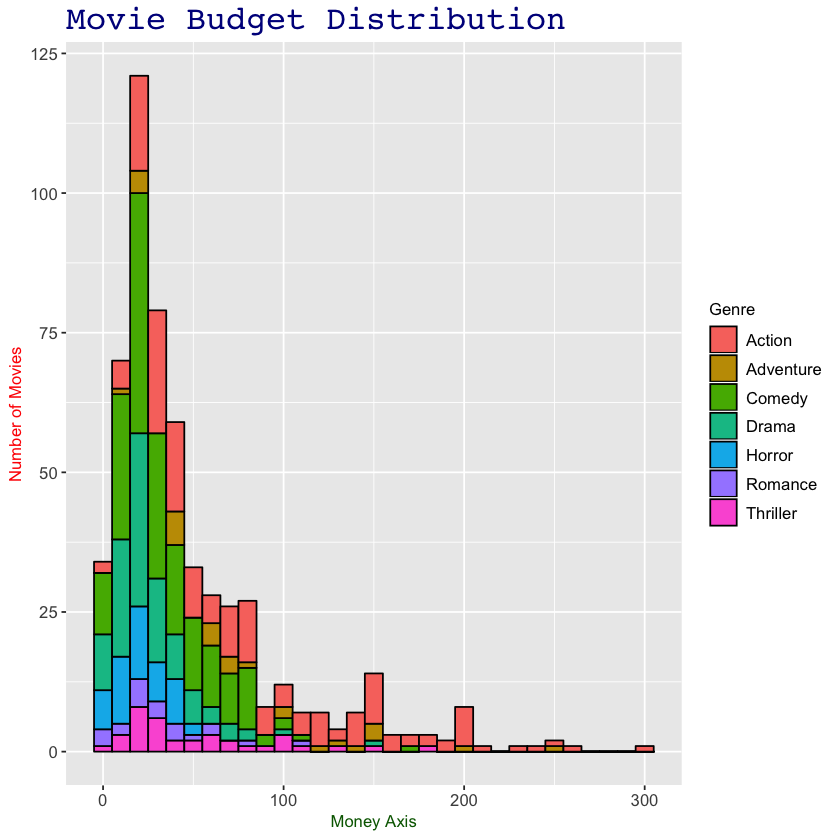

In [102]:
#Legend foramatting

h +
  xlab("Money Axis") +
  ylab("Number of Movies") +
  ggtitle("Movie Budget Distribution") +
  theme(axis.title = element_text(colour="DarkGreen", size=10),
        axis.title.y = element_text(colour="Red", size=10),
        axis.text.x = element_text(size=10),
        axis.text.y = element_text(size=10),
        
        legend.title = element_text(size=10),
        legend.text = element_text(size=10),
        legend.position = "right",
        
        plot.title = element_text(colour="DarkBlue", size=20, 
                                  family="Courier"))